# Maximum Likelihood Estimation (MLE), a probabilisitic framework for model parameter estimation 
Created by Dr. James G. Shanahan


## Key takeaways:

* Naive Bayes Classifiers with discrete and continous input variables
* Likelihood vs probability:

  - $\mathcal{L}(\theta|x, y) = p(y|x, \theta)$
  - $p(y|x, \theta)$ -> "probability of observing the response $y$ given parameter $\theta$ and input $x$"
  - $\mathcal{L}(\theta|x, y)$ -> "likelihood model that parameters $\theta$ produced response $y$ from input $x$"

* Log-likelihood maximization (which is equivalent to negative log likelihood minimization):

  - We take the $\log$ of the likelihood function for computational convenience
  - The parameters $\theta$ that maximizes $\log\mathcal{L}(\theta|x, y)$ are the model parameters that maximize the probability of observing the data.

**Key point**: the log-likelihood is a flexible cost function, and is often used to find model parameters that best fit the data.


##  Notation

\begin{align}
x &\quad \text{input, independent variable}\\
y &\quad \text{response measurement, dependent variable}\\
\mathbf{x} &\quad \text{vector of input values}\\
\mathbf{y} &\quad \text{vector of measurements}\\
\epsilon &\quad \text{measurement error, noise contribution}\\
\epsilon \sim \mathcal{N}(\mu, \sigma^2) &\quad \text{random variable } \epsilon \text{ is distributed according to a Gaussian distribution, with mean } \mu \text{ and variance } \sigma^2\\
\mu &\quad \text{mean}\\
\sigma^2 &\quad \text{variance}\\
\sigma &\quad \text{standard deviation}\\
\theta &\quad \text{parameter}\\
\hat{\theta} &\quad \text{estimate of parameter}\\
\mathcal{L}(\theta|x, y) &\quad \text{likelihood of that parameter } \theta \text{ producing response } y \text{ from input } x \\ 
\mathcal{LL}(\theta|x, y) &\quad \text{log likelihood of that parameter } \theta \text{ producing response } y \text{ from input } x \\ 
\mathcal{NLL}(\theta|x, y) &\quad \text{negative log likelihood of that parameter } \theta \text{ producing response } y \text{ from input } x \\ 
p(y|x, \theta) &\quad \text{probability of observing the response } y \text{ given input } x \text{ and parameter } \theta \\ 
&\quad
\end{align}


### Refereneces:

* Excellent introduction to Naive Bayes:  Chapter 4 in [Speech and Language Processing (3rd ed. draft), Dan Jurafsky and James H. Martin](https://web.stanford.edu/~jurafsky/slp3/4.pdfhttps://web.stanford.edu/~jurafsky/slp3/4.pdf)

## Swtich equation numbering on to automatic


In [4]:
%%javascript
MathJaax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

# Naive Bayes classifiers
In statistics, naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence assumptions between the features. Naïve Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (inputs/features/predictors) in a learning problem. Maximum-likelihood training can be done by evaluating a closed-form expression, which takes linear time, rather than by expensive iterative approximation as used for many other types of classifiers (e.g., logistic regression. In the statistics literature, naive Bayes models are known under a variety of names, including simple Bayes and independence Bayes. 

This section is based on:

* https://en.wikipedia.org/wiki/Naive_Bayes_classifier

## Probabilistic model 

Abstractly, naïve Bayes is a conditional probability model: given a problem instance to be classified, represented by a vector $\mathbf{x} = (x_1, \ldots, x_n)$ representing some $n$ features (independent variables), it assigns to this instance probabilities

$$p(C_k \mid x_1, \ldots, x_n)$$

for each of $k$ possible outcomes or `classes` $C_k$.

The problem with the above formulation is that if the number of features $n$ is large or if a feature can take on a large number of values, then basing such a model on conditional probability is infeasible (the representation complexity is exponential and the data requirements are exponential). The model must therefore be reformulated to make it more tractable. Using Bayes' theorem, the conditional probability can be decomposed as

$$p(C_k \mid \mathbf{x}) = \frac{p(C_k) \ p(\mathbf{x} \mid C_k)}{p(\mathbf{x})} $$

In plain English, using Bayesian probability terminology, the above equation can be written as

$$\text{posterior} = \frac{\text{prior} \times \text{likelihood}}{\text{evidence}} $$

In practice, the denominator can be dropped from this calculation as it does not depend on the class variable $C$ and the values of the features $x_i$ are given, so that the denominator is effectively constant.
The numerator is equivalent to the joint probability model

$$p(C_k, x_1, \ldots, x_n)$$


which can be rewritten as follows, using the [Chain rule (of probability)](https://en.wikipedia.org/wiki/Chain_rule_(probability)) for repeated applications of the definition of conditional probability:

$$
\begin{align}
p(C_k, x_1, \ldots, x_n) & = p(x_1, \ldots, x_n, C_k) \\
                        & = p(x_1 \mid x_2, \ldots, x_n, C_k) \ p(x_2, \ldots, x_n, C_k) \\
                        & = p(x_1 \mid x_2, \ldots, x_n, C_k) \ p(x_2 \mid x_3, \ldots, x_n, C_k) \ p(x_3, \ldots, x_n, C_k) \\
                        & = \cdots \\
                        & = p(x_1 \mid x_2, \ldots, x_n, C_k) \ p(x_2 \mid x_3, \ldots, x_n, C_k) \cdots   p(x_{n-1} \mid x_n, C_k) \ p(x_n \mid C_k) \ p(C_k) \\
\end{align}
$$

Now the "naïve" conditional independence assumptions come into play: assume that all features in <math>\mathbf{x}</math> are mutually independent, conditional on the category <math>C_k</math>. Under this assumption,

$$p(x_i \mid x_{i+1}, \ldots ,x_{n}, C_k ) = p(x_i \mid C_k)\,$$.

Thus, the joint model can be expressed as

$$
\begin{align}
p(C_k \mid x_1, \ldots, x_n) & \varpropto p(C_k, x_1, \ldots, x_n) \\
                            & \varpropto p(C_k) \ p(x_1 \mid C_k) \ p(x_2\mid C_k) \ p(x_3\mid C_k) \ \cdots \\
                            & \varpropto p(C_k) \prod_{i=1}^n p(x_i \mid C_k)\,,
\end{align}
$$

where $\varpropto$ denotes proportionality.

This means that under the above independence assumptions, the conditional distribution over the class variable $C$ is:

$p(C_k \mid x_1, \ldots, x_n) = \frac{1}{Z} p(C_k) \prod_{i=1}^n p(x_i \mid C_k)$

where the evidence $Z = p(\mathbf{x}) = \sum_k p(C_k) \ p(\mathbf{x} \mid C_k)$ is a scaling factor dependent only on $x_1, \ldots, x_n$, that is, a constant if the values of the feature variables are known.

## Prediction rule for the Naive Bayes classifier 

The discussion so far has derived the independent feature model (think continous features, discrete features), that is, the naïve Bayes probability model. The naïve Bayes classifier combines this model with a decision rule. One common rule is to pick the hypothesis that is most probable; this is known as the maximum a posteriori or MAP decision rule. The corresponding classifier, a Bayes classifier, is the function that assigns a class label $\hat{y} = C_k$for some $k$ as follows:

$$\hat{y} = \underset{k \in \{1, \ldots, K\}}{\operatorname{argmax}} \ p(C_k) \displaystyle\prod_{i=1}^n p(x_i \mid C_k)$$

## Estimating the Parameter of a NB model

A class's prior may be calculated by assuming equiprobable classes (''i.e.'', $p(C_k) = 1/K$), or by calculating an estimate for the class probability from the training set (''i.e.'', $\text{prior for a given class} = \frac{\text{<number of samples in the class>}}{\text{<total number of samples>}}$). To estimate the parameters for a feature's distribution, one must assume a distribution or generate nonparametric models for the features from the training set.

The assumptions on distributions of features are called the "event model" of the naïve Bayes classifier. 
* For discrete features like the ones encountered in document classification (include spam filtering), multinomial and Bernoulli distributions are popular. These assumptions lead to two distinct models, which are often confused.


### Multinomial naïve Bayes 
Naive Bayes models can be used to classify data with discrete input variables such as text documents. Here each document is represented by a feature vector with integer elements whose value is the frequency of that word in the document.

Consider the follow example with a vocabulary of:

`V = {blue,red, dog, cat, biscuit, apple}`

In this case, the vocabulary size, |V|, is 6. Now consider the (short) document “the blue dog ate a blue biscuit”. If $d_{ber}$ is the Bernoulli feature vector for this document, and $d_{mul}$ is the multinomial feature vector, then the documents could be represented in vector form as follows:


$$\begin{aligned}
d_{ber} &= (1, 0, 1, 0, 1, 0)^T \\
d_{mul} &= (2, 0, 1, 0, 1, 0)^T
\end{aligned}$$
 
* With a multinomial event model, samples (feature vectors) represent the frequencies with which certain events have been generated by a multinomial.
* In the multivariate Bernoulli event model, features are independent Booleans (binary variables) describing inputs. Like the multinomial model, this model is popular for document classification tasks, where binary term occurrence features are used rather than term frequencies.
 
In more detail, with a multinomial event model, samples (feature vectors) represent the frequencies with which certain events have been generated by a multinomial $(p_1, \dots, p_n)$ where $p_i$ is the probability that event {{mvar|i}} occurs (or {$K$ such multinomials in the multiclass case). A feature vector $\mathbf{x} = (x_1, \dots, x_n)$is then a histogram, with $x_i$ counting the number of times event $i$ was observed in a particular instance. This is the event model typically used for document classification, with events representing the occurrence of a word in a single document (see bag of words assumption). As for the multinomial model, the parameters of the likelihood are the probabilities of each word given
the document class $P(x_i||C_k)$, and the model parameters also include the prior probabilities $P(C_k)$. The maximum likelihood 
estimate of these parameters from a training set of documents, {D_1, D_2, . . . , D_m}, can be accomplished by  letting z_{ik} be an indicator
variable which equals $1$ when $D_i$ belongs to class $k$, and equals 0 otherwise. If $m$ is again the total
number of documents, then we have maximum likelihood 
estimates defined as follows :



$$
p(x_i \mid C_k) =  \frac{(\sum_{j=1}^m freq(x_{ijk}))}{(\sum_{j=1}^m \sum_{g=1}^v freq(x_{gjk}))}
$$


$\sum_{j=1}^m freq(x_{ijk}))$ is the number of times that word $x_i$ occurs across all examples documents of class $k$. And  $ \frac{(\sum_{j=1}^m freq(x_{ijk}))}{(\sum_{j=1}^m \sum_{g=1}^v freq(x_{gjk}))}$ denotes the relative frequency of word $x_i$ across all documents for class $k$. Think in terms of doing a word count of all the documents for a class and computing the relative frequency of each term from the resulting frequncy distribution. 


The multinomial naïve Bayes classifier becomes a linear classifier when expressed in log-space:

$$
\begin{align}\tag{multinomial naïve Bayes classifier}
\log p(C_k \mid \mathbf{x}) & \varpropto \log \left( p(C_k) \prod_{i=1}^n {p_{ki}}^{x_i} \right) \\
                       & = \log p(C_k) + \sum_{i=1}^n x_i \cdot \log p_{ki}                 \\
                       & = b + \mathbf{x}^\top\mathbf{w}_k
\end{align}
$$

where $b = \log p(C_k)$ and $w_{ki} = \log p_{ki}$. For a more complete presentation and derivation please see [here](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)

#### Regularization in Multinomial Naive Bayes models
If a given class and feature value never occur together in the training data, then the frequency-based probability estimate will be zero, because the probability estimate is directly proportional to the number of occurrences of a feature's value. This is problematic because it will wipe out all information in the other probabilities when they are multiplied. Therefore, it is often desirable to incorporate a small-sample correction, called pseudocount, in all probability estimates such that no probability is ever set to be exactly zero. This way of regularizing naive Bayes is called Laplace smoothing when the pseudocount is one, and Lidstone smoothing in the general case.

In otherwords, a drawback of relative frequency estimates for the multinomial model—is that zero
counts result in estimates of zero probability. This is a bad thing because the Naive Bayes equation for
the likelihood  involves taking a product of probabilities: if any one of the terms of
the product is zero, then the whole product is zero. This means that the probability of the document
belonging to the class in question is zero—which means it is impossible. Just because a word does not occur in a document class in the training data does not mean that it cannot occur in any document of that class.

The problem is vanilla multinomial Naive Bayes is that it underestimates the likelihoods of words that do not occur in the
data. Even if word w is **not** observed for class k in the training set, we would still like P(w | Ck) > 0.
Since probabilities must sum to 1, if unobserved words have underestimated probabilities, then those
words that are observed must have overestimated probabilities. Therefore, one way to alleviate the problem is to remove a small amount of probability allocated to observed events and distribute this across the unobserved events. A simple way to do this, sometimes called Laplace’s law of succession or **add-one smoothing**, adds a count of one to each word in the model vocabulary. If there are V unique words  in total, then word class conditionals can be estimated as follows:



$$
p(x_i \mid C_k) =  \frac{(1+ \sum_{j=1}^m freq(x_{ijk}))}{V + (\sum_{j=1}^m \sum_{g=1}^v freq(x_{gjk}))}
$$



In [334]:
def word_count(str):
    counts = dict()
    words = str.lower().split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

print( word_count("This is a short doc. It is very short. Short is good."))
# relative freq of each word


{'this': 1, 'is': 3, 'a': 1, 'short': 2, 'doc.': 1, 'it': 1, 'very': 1, 'short.': 1, 'good.': 1}


#### Worked example of Multinomial Naive Bayes 

* Credit to Hiroshi Shimodaira for the examples

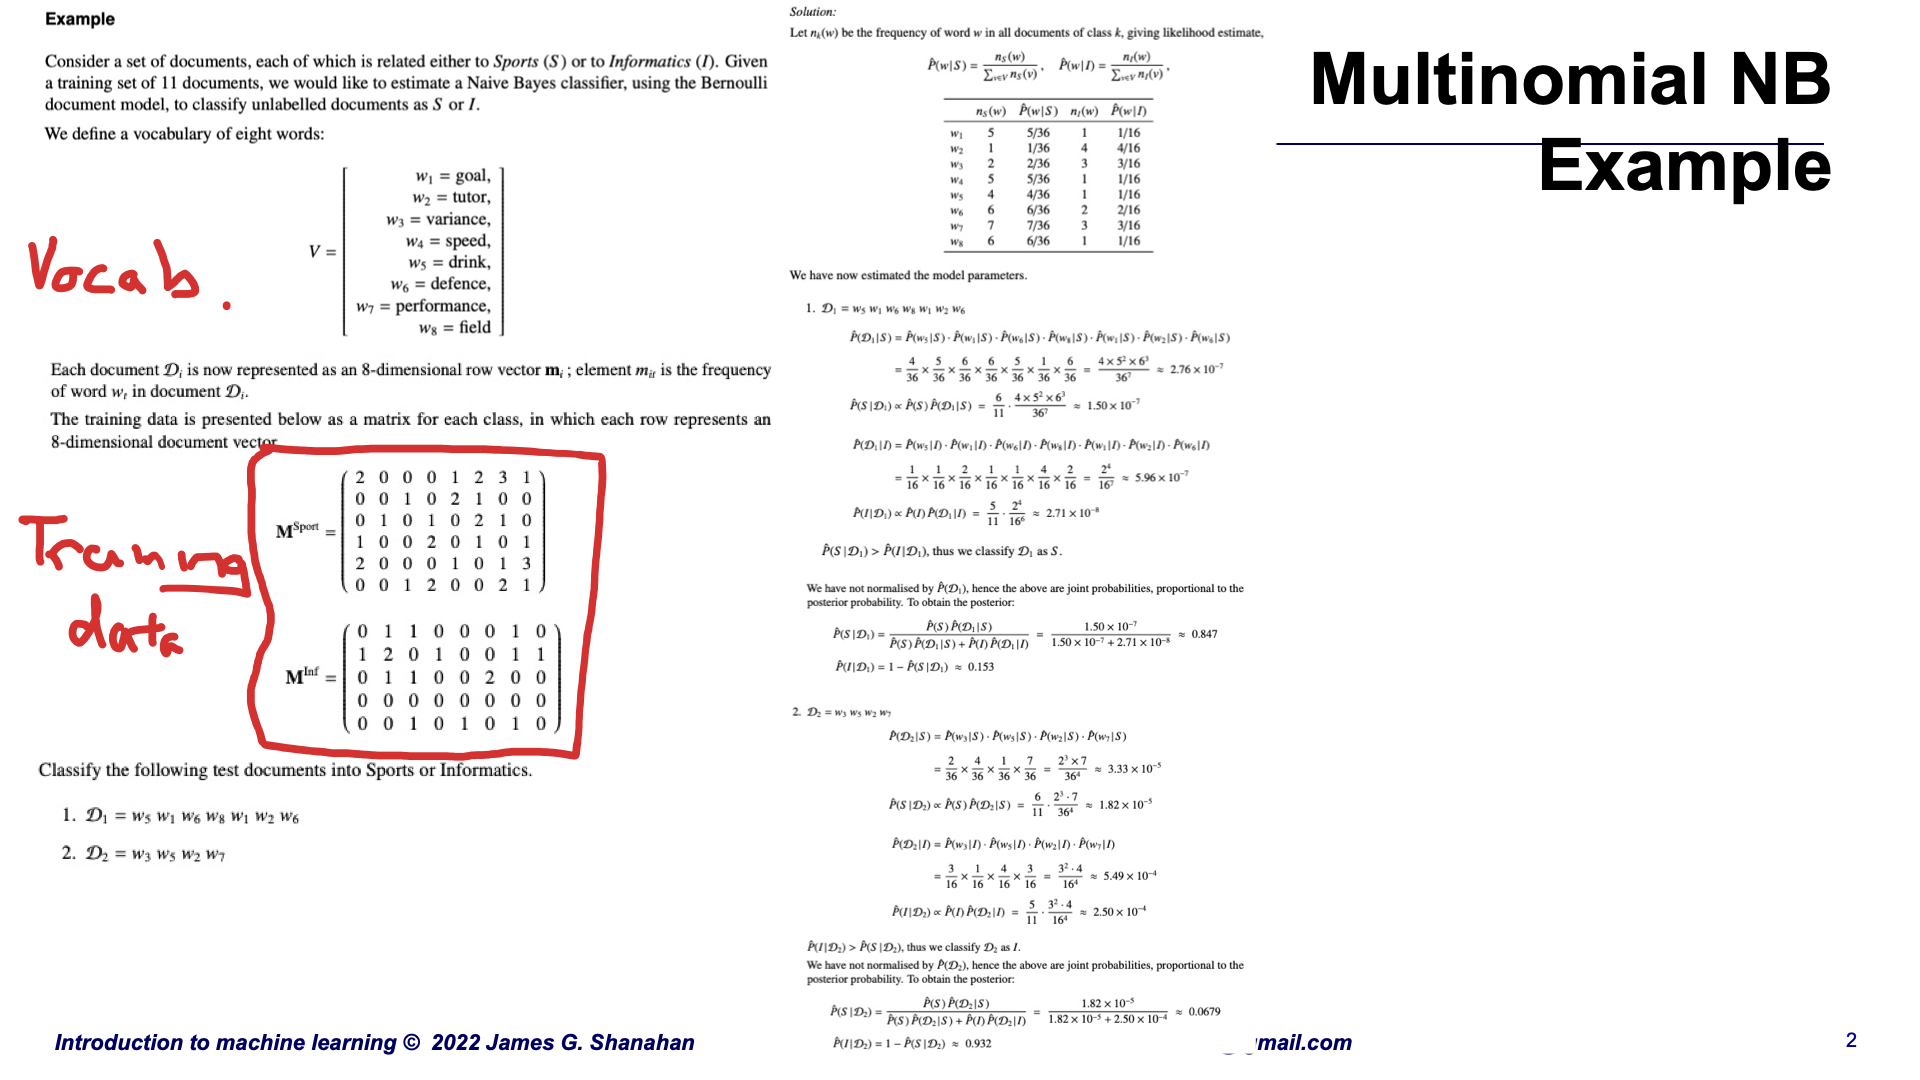

### Bernoulli Naive Bayes
In the multivariate Bernoulli event model, features are independent Booleans (binary variables) describing inputs. Like the multinomial model, this model is popular for document classification tasks, where binary term occurrence features are used rather than term frequencies. If $x_{i}$ is a boolean expressing the occurrence or absence of the i'th term from the vocabulary, then the likelihood of a document given a class $Y_{k}$  is given by

$$p(\mathbf{x} \mid Y_k) = \prod_{i=1}^n p_{ki}^{x_i} (1 - p_{ki})^{(1-x_i)}$$

where $p_{ki}$ is the probability of class $C_k$ generating the term $x_i$. This event model is especially popular for classifying short texts. It has the benefit of explicitly modelling the absence of terms. Note that a naive Bayes classifier with a Bernoulli event model is not the same as a multinomial NB classifier with frequency counts truncated to one.


Let's look at this in a bit more detail for the simple case that each $X_i$ and $Y$ are all binary.  In this case, we can represent the entire joint distribution by modeling the different Bernoulli distributions

\begin{equation}
p(Y ; \phi_0), \;\; p(X_i  \mid  Y=0; \phi_i^0) , \;\; p(X_i  \mid  Y=1; \phi_i^1).
\end{equation}

Furthermore, given a collection of examples $(x^{(1)}, y^{(1)}), \ldots, (x^{(m)}, y^{(m)})$, we can form the maximum likelihood estimates of these parameters simply by 

\begin{equation}
\phi_0 = \frac{\sum_{j=1}^m y^{(j)}}{m}, \;\; \phi_i^y = \frac{\sum_{j=1}^m x_i^{(j)} \mathrm{1}\{y^{(j)} = y\}}{\sum_{j=1}^m \mathrm{1}\{y^{(j)} = y\}}
\end{equation}

where $\mathrm{1}\{\cdot\}$ denotes the 0-1 indicator, the function that is one if the inner argument is true and zero otherwise.  Although this notation is a bit involved, the basic idea is really quite straightforward: in order to estimate the probability $p(X_i=1 \mid Y=1)$ (this is precisely the parameter $\phi_i^1$), we just sum over all the times that $X_i=1$ and $Y=1$, and divide by the number of times that $Y=1$.  Although we don't prove it, you should be able to easily convince yourself that this result follows exactly from the same principle of maximum likelihood that we saw above.

##### Making predictions using the Bernoulli Naive Bayes
Now that we have modeled the joint probability as a product of Bernoullis in the manner described above, how do we use this to make a prediction given some test case $x$.  The difficulty here is that we have only modeled the conditional distribution $p(X \mid Y)$, not $p(Y \mid X)$; fortunately, this is precisely that Bayes' rule allows us to compute

\begin{equation}
p(Y \mid X) = \frac{p(X \mid Y)p(Y)}{\sum_y p(X \mid y) p(y)}.
\end{equation}

Making this a bit more concrete in terms of the parameters above, for some specific input x $x$

\begin{equation}
p(Y = y \mid X = x) =  \frac{(\phi^0)^y(1-\phi_0)^{(1-y)} \prod_{i=1}^n (\phi_i^y)^{x_i} (1-\phi_i^y)^{(1-x_i)} }{
\sum_{y'}(\phi^0)^{y'}(1-\phi_0)^{(1-y')} \prod_{i=1}^n (\phi_i^{y'})^{x_i} (1-\phi_i^{y'})^{(1-x_i)}}.
\end{equation}

If we are just trying to find the most likely class prediction, we don't necessarily even need to compute the precise probabilities here, we can just compute the numerator terms for each class and then predict the class with the maximum probability (though note that the denominator is just the sum of of the numerator terms over all classes, so it's not any harder to compute the actual probabilities).

##### Common issues and solutions

When implementing a Bernouilli naive Bayes, similar to the multinomial NB model, there are a few common issues that come up which are important to know how to address.  We don't directly show these in code (as implementing naive Bayes is one of the homework problems for this course), the basic ideas are straightforward.

**Log probabilities** The challenge here is that the when we are computing probabilities, the product
\begin{equation}
p(y)\prod_{i=1}^n p(x_i \mid y)
\end{equation}
can be very small, and will quickly go to zero to the numerical precision of floating point numbers.  To resolve this issue, a simple solution is to instead compute the probability in their log space
\begin{equation}
\log p(y) + \sum_{i=1}^n \log p(x_i \mid y).
\end{equation}
If you only want to compute the most likely class, you can just compute these log terms for all possible classes and them predict the most likely one.

**Laplace smoothing**  The second problem is that, if we have never seen some $X_i = 0$ or $X_i = 1$ (for a particular assignment to $Y$, the corresponding probabilities will be zero (and if you take logs, the result would be negative infinity).  To overcome this, we can employ Laplace smoothing, as we saw in the previous lecture on n-gram modeling.  For example, we could replace the probability estimates with
\begin{equation}
\phi_i^y = \frac{\sum_{j=1}^m x_i^{(j)} \mathrm{1}\{y^{(j)} = y\} + 1}{\sum_{j=1}^m \mathrm{1}\{y^{(j)} = y\} + 2}
\end{equation}
which is equivalent to "hallucinating" one 0 and one 1 for each of the variables $X_i$.

#### Worked example of Bernoulli NB

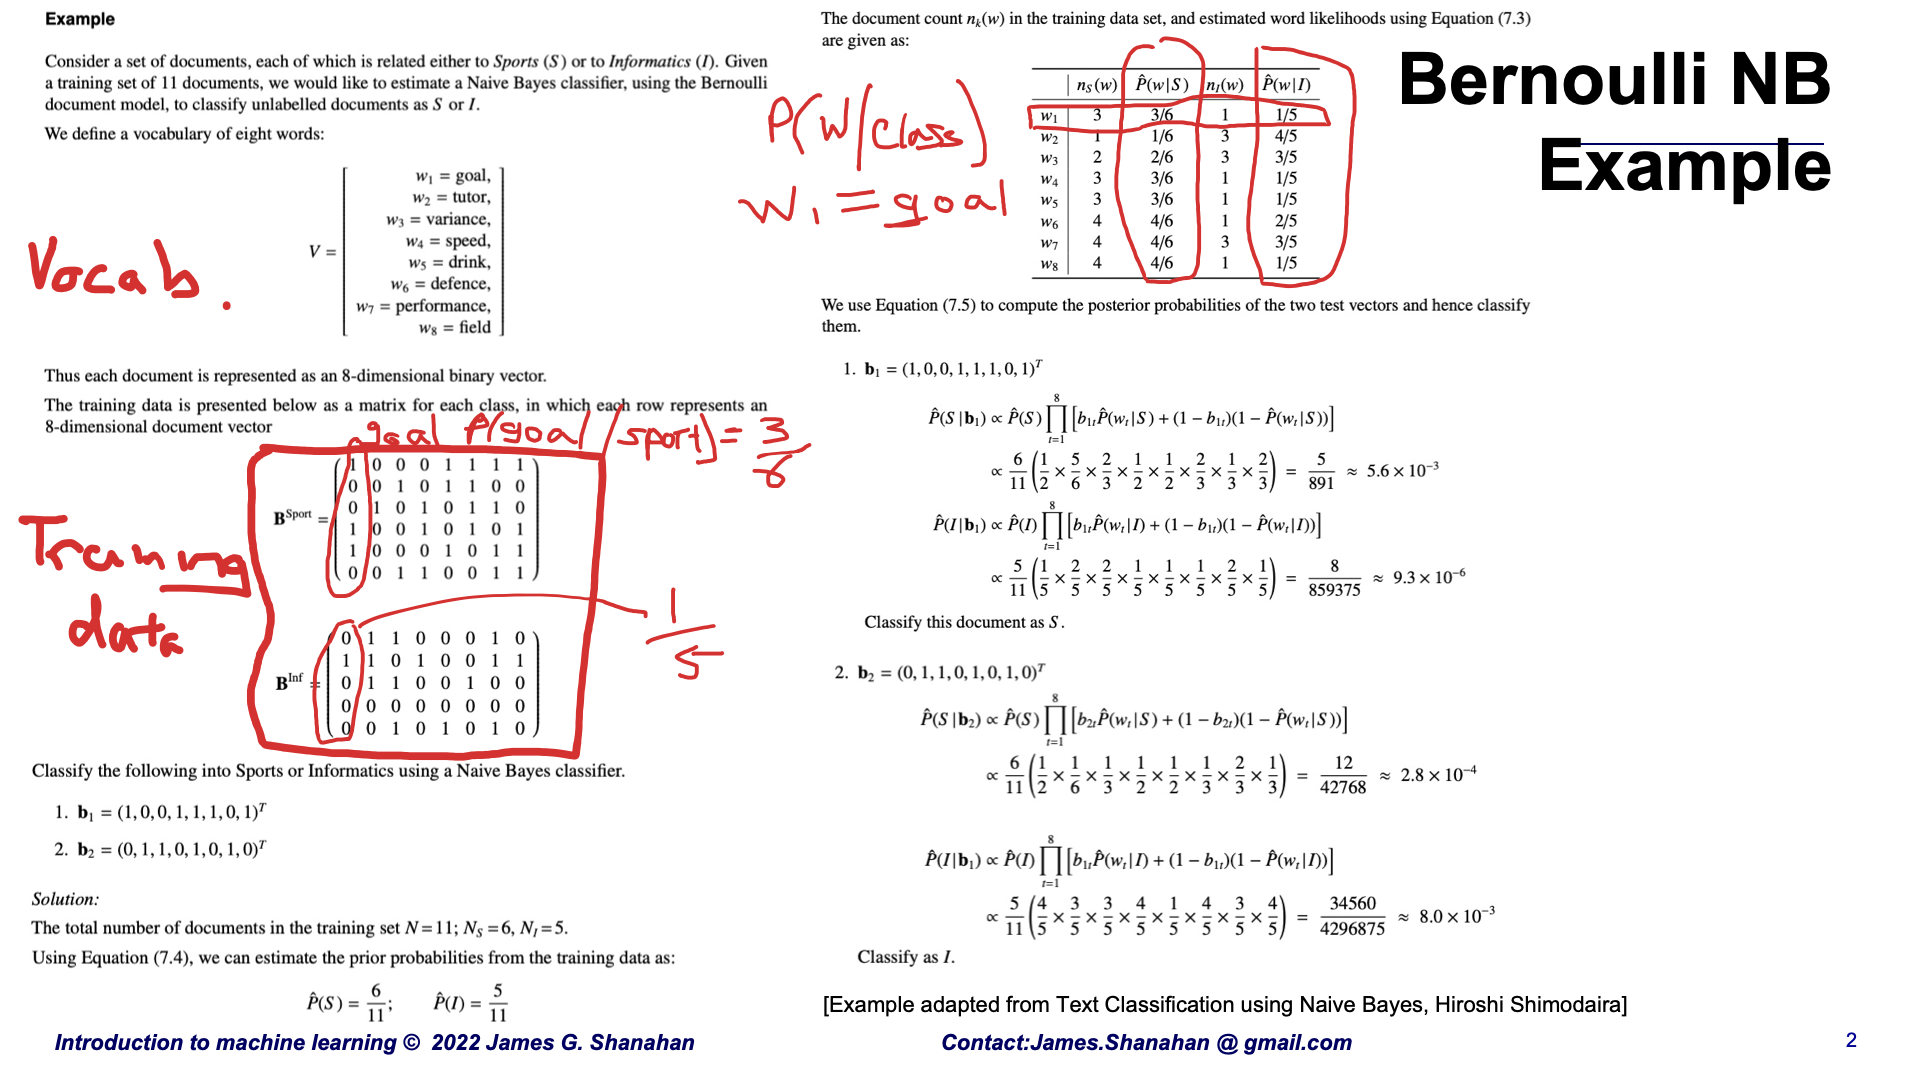

### Modeling continous variables via the Gaussian distribution

Although naive Bayes is often presented as "just counting", the previous discussion on maximum likelihood estimation connection hopefully makes it clear that we can actually apply any model for the distribution $p(X_i \mid Y)$, and just estimate its parameters via maximum likelihood estimation.  For example (as you will also do on the homework), if $x_i$ is real-valued $p(X_i \mid Y)$ as a Gaussian

\begin{equation}
p(X_i = x_i \mid Y =y) = \mathcal{N}(x_i;\mu_y \sigma_y^2)
\end{equation}

where $\mu_y$ and $\sigma_y^2$ are the parameters of the distribution.  Again, following the maximum likelihood formulation, we can estimate these parameters as

\begin{equation}
\mu_y = \frac{\sum_{j=1}^m x_i^{(j)} \mathrm{1}\{y^{(j)} = y\}}{\sum_{j=1}^m \mathrm{1}\{y^{(j)} = y\}}, \;\; 
\sigma^2_y = \frac{\sum_{j=1}^m (x_i^{(j)}-\mu_y)^2 \mathrm{1}\{y^{(j)} = y\}}{\sum_{j=1}^m \mathrm{1}\{y^{(j)} = y\}}
\end{equation}

which again are just the standard Gaussian MLE estimates except restricted to just those cases where $y^{(j)} = y$.


## How to build a basic model using Naive Bayes using SKLearn in Python?
The scikit learn package will help here to build a Naive Bayes model in Python. There are three types of Naive Bayes model under the [scikit-learn library](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html):

* **Gaussian**: Here the form of class conditionals $P(X_i|C)$ corresponding to features parameters follows a normal distribution.

* **Multinomial**: It is used for input feature spaces that consist of discrete counts. For example, let’s say,  we have a text classification problem. Here we can consider Bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.

* **Bernoulli**: The binomial model is useful if your feature vectors are binary (i.e. zeros and ones). One application would be text classification with ‘bag of words’ model where the 1s & 0s are “word occurs in the document” and “word does not occur in the document” respectively.

# TASK: MCQ Questions

## Question
What is the number of parameters needed to represent a Naive Bayes classifier with n
Boolean variables and a Boolean label ?

Options:
* (a) 2n + 1
* (b) n + 1
*(c) 2n
* (d) n

Ans: (a)

##  Train a multinomial Naive Bayes Classifier with no smoothing using D1, D2, D3, D4. 
Let's train a multinomial Naive Bayes Classifier with no smoothing using the training documents (i.e., D1, D2, D3, D4). Note each record has three tab separated fields:
* Document ID 
* class (where $1$ denotes Chinese; and $0$ denotes not Chinese)
* document content



||Document ID|class|document content|
|-----:|:-------------:|:-------------:|:-----|
|Training|D1|1|Chinese Beijing Chinese|
||D2|1|Chinese Chinese Shanghai|
||D3|1|Chinese Macao|
||D4|0|Tokyo Japan Chinese|
|Test|D5|?|Chinese Chinese Chinese Tokyo Japan|

The word class conditionals, $Pr(word|Class)$, are given in the following table. Please verify them. 


|word      | Pr(word	&#124;Class==0) | Pr(word&#124;Class==1)  |
| ------------- |:-------------:| -----:|
| Chinese     | 1/3 |5/8|
| Beijing     | 0   |   1/8|
| Shanghai  | 0      |    1/8 |
| Macao     | 0    |    1/8 |
| Tokyo |1/3     |    0 |
| Japan | 1/3   |    0 |

### QUIZ: Calculate the posterior probabilities for D5 given an unsmoothed MNB model

```#-------D5 is a Test document 
D5	0	Chinese Chinese	Chinese Tokyo Japan
```
What is the class of D5?  What is the posterior probabilities of D5 (Pr(Class=0|D5) versus Pr(Class=1|D5)?

In [1]:
#.  P(c1)      * P(Chinese|c1) *  P(Chinese|c1) *   P(Chinese|c1) *  P(Tokyo|c1) * P(Japan|c1)
c1 = (3/4)     * ((5/8)        * (5/8)          * (5/8)           *  (0)         * (0))
c0 = (1/4)     * ((1/3)        * (1/3)          * (1/3)           *(1/3)         * (1/3))

In [2]:
c1  #get 0 unnormalized P(class = 1|D5) = 0

0.0

In [3]:
c0 # unnormalized probability

0.0010288065843621398

In [ ]:
c1/(c1+c0)

In [4]:
import numpy as np
np.argmax([c0,c1])
print(100* c1/(c1+c0))
print(100* c0/(c1+c0))
print(f"Pr(Chinese    |D5): {100* c1/(c1+c0):7.4}%") 
print(f"Pr(Not Chinese|D5): {100* c0/(c1+c0):7.4}%") 

0.0
100.0
Pr(Chinese    |D5):     0.0%
Pr(Not Chinese|D5):   100.0%


## QUIZ: posterior probabilities for D5 given a smoothed multinomial Naive Bayes Classifier model


||Document ID|class|document content|
|-----:|:-------------:|:-------------:|:-----|
|Training|D1|1|Chinese Beijing Chinese|
||D2|1|Chinese Chinese Shanghai|
||D3|1|Chinese Macao|
||D4|0|Tokyo Japan Chinese|
|Test|D5|?|Chinese Chinese Chinese Tokyo Japan|

Train a smoothed multinomial Naive Bayes Classifier with laplace smoothing (plus one smoothing). Assume $D5$ is as follows:


```Chinese Chinese	Chinese Tokyo Japan```

What is the class of D5?  What is the posterior probabilities of D5 (Pr(Class=0|D5) versus Pr(Class=1|D5)?

|word        | Pr(Word &#124;Class=0)           | Pr(Word&#124;Class=1)  |
| ------------- |:-------------:| -----:|
| Chinese     | (1+1)/(3+6) |(5+1)/(8+6)|
| Beijing     |(0+1)/(3+6)  |   (1+1)/(8+6)|
| Shanghai  | (0+1)/(3+6)     |    (1+1)/(8+6) |
| Macao     | (0+1)/(3+6)   |    (1+1)/(8+6) |
| Tokyo |(1+1)/(3+6)    |   (0+1)/(8+6) |
| Japan | (1+1)/(3+6)  |    (0+1)/(8+6) |

In [ ]:
(6/14)*(6/14)*(6/14)*(1/14)*(1/14)*(3/4)

In [6]:

#.   Pr(Chinese|C) * Pr(Chinese|)  * Pr(Chinese|C) * Pr(Tokyo|C)   * Pr(Japan|C)  * Pr(Chinese)
c1 = ((5+1)/(8+6)) * ((5+1)/(8+6)) *((5+1)/(8+6))  * ((0+1)/(8+6)) * ((0+1)/(8+6) *  (3/4))  # Chinese numerator
c0 = ((1+1)/(3+6)) * ((1+1)/(3+6)) * ((1+1)/(3+6)) * ((1+1)/(3+6)) * ((1+1)/(3+6)) * (1/4)   # NOT Chinese numerator

In [7]:
# (3/4)*(3/7)**3 * (1/14) * (1/14) # Chinese numerator

In [8]:
print(f"Pr(Chinese    |D5): {100* c1/(c1+c0):7.4}%") 


Pr(Chinese    |D5):   68.98%


In [9]:
import numpy as np
np.argmax([c0,c1])
print(100* c1/(c1+c0))
print(100* c0/(c1+c0))
print(f"Pr(Chinese    |D5): {100* c1/(c1+c0):7.4}%") 
print(f"Pr(Not Chinese|D5): {100* c0/(c1+c0):7.4}%") 

68.97586117634674
31.024138823653264
Pr(Chinese    |D5):   68.98%
Pr(Not Chinese|D5):   31.02%


## QUIZ: posterior probabilities for D5 given a unsmoothed Bernouill Naive Bayes Classifier model

```#-------D5 is a Test document 
D5	0	Chinese Chinese	Chinese Tokyo Japan
```
What is the class of D5 using this model?  What is the posterior probabilities of D5 (Pr(Class=0|D5) versus Pr(Class=1|D5)?

||Document ID|class|document content|
|-----:|:-------------:|:-------------:|:-----|
|Training|D1|1|Chinese Beijing Chinese|
||D2|1|Chinese Chinese Shanghai|
||D3|1|Chinese Macao|
||D4|0|Tokyo Japan Chinese|
|Test|D5|?|Chinese Chinese Chinese Tokyo Japan|

|word        |$n_1$(w)| Pr(Word &#124;Class=1)           |$n_0$(w)| Pr(Word&#124;Class=0)  |
| -------------|----- |:-------------:|-----| -----:|
| Chinese     |5| 3/3 |1|1/1|
| Beijing     |1|1/3  |0|   0|
| Shanghai  |1| 1/3     |0|    0 |
| Macao     |1| 1/3   |0|    0|
| Tokyo |0|0   |1|   1/1 |
| Japan |0| 0  |1|    1/1 |

Example:<br>
c1 = Pr(Chinese) * ((1*((3)/(3)) + 0*(1-(3)/(3))) * (0*((1)/(3)) + 1*(1-(1)/(3))) * (0*((1)/(3)) + 1*(1-(1)/(3))) * (0*((1)/(3)) + 1*(1-(1)/(3))) * (1*((0)/(3)) + 0*(1-(0)/(3))) * (1*((0)/(3)) + 0*(1-(0)/(3))))

In [2]:
c1 = (3/4) * ((1*(3/3) + 0*(1-(3/3)))*(0*(1/3) + 1*(1-(1/3)))*(0*(1/3) + 1*(1-(1/3)))*(0*(1/3) + 1*(1-(1/3)))*(1*(0/3) + 0*(1-(0/3)))*(1*(1/3) + 0*(1-(1/3))))
c0 = (1/4) * ((1*(1/1) + 0*(1-(1/1)))*(0*(0/1) + 1*(1-(0/1)))*(0*(0/1) + 1*(1-(0/1)))*(0*(0/1) + 1*(1-(0/1)))*(1*(1/1) + 0*(1-(1/1)))*(1*(1/1) + 0*(1-(1/1))))

In [3]:
c1

0.0

In [4]:
c0

0.25

In [5]:
import numpy as np
np.argmax([c0,c1])
print(100* c1/(c1+c0))
print(100* c0/(c1+c0))
print(f"Pr(Chinese    |D5): {100* c1/(c1+c0)}%") 
print(f"Pr(Not Chinese|D5): {100* c0/(c1+c0)}%") 

0.0
100.0
Pr(Chinese    |D5): 0.0%
Pr(Not Chinese|D5): 100.0%


## QUIZ: posterior probabilities for D5 given a `smoothed` Bernouill Naive Bayes Classifier mode 

```#-------D5 is a Test document 
D5	0	Chinese Chinese	Chinese Tokyo Japan
```
What is the class of D5 using this model?  What is the posterior probabilities of D5 (Pr(Class=0|D5) versus Pr(Class=1|D5)?

||Document ID|class|document content|
|-----:|:-------------:|:-------------:|:-----|
|Training|D1|1|Chinese Beijing Chinese|
||D2|1|Chinese Chinese Shanghai|
||D3|1|Chinese Macao|
||D4|0|Tokyo Japan Chinese|
|Test|D5|?|Chinese Chinese Chinese Tokyo Japan|

In [6]:
c1 = (3/4) * ((1*((3+1)/(3+6)) + 0*(1-(3+1)/(3+6))) * (0*((1+1)/(3+6)) + 1*(1-(1+1)/(3+6))) * (0*((1+1)/(3+6)) + 1*(1-(1+1)/(3+6))) * (0*((1+1)/(3+6)) + 1*(1-(1+1)/(3+6))) * (1*((0+1)/(3+6)) + 0*(1-(0+1)/(3+6))) * (1*((0+1)/(3+6)) + 0*(1-(0+1)/(3+6))))
c0 = (1/4) * ((1*((1+1)/(1+6)) + 0*(1-(1+1)/(1+6))) * (0*((0+1)/(1+6)) + 1*(1-(0+1)/(1+6))) * (0*((0+1)/(1+6)) + 1*(1-(0+1)/(1+6))) * (0*((0+1)/(1+6)) + 1*(1-(0+1)/(1+6))) * (1*((1+1)/(1+6)) + 0*(1-(1+1)/(1+6))) * (1*((1+1)/(1+6)) + 0*(1-(1+1)/(1+6))))

In [7]:
c1

0.0019362450394305292

In [8]:
c0

0.0036719394129996856

In [9]:
import numpy as np
np.argmax([c0,c1])
print(100* c1/(c1+c0))
print(100* c0/(c1+c0))
print(f"Pr(Chinese    |D5): {100* c1/(c1+c0)}%") 
print(f"Pr(Not Chinese|D5): {100* c0/(c1+c0)}%") 

34.525345160348444
65.47465483965155
Pr(Chinese    |D5): 34.525345160348444%
Pr(Not Chinese|D5): 65.47465483965155%


## SPAM versus HAM

In this section learn a multinomial Naive Bayes model using all the training data . Please use unigrams features (i.e., single words, like "very", "bad").  You would then learn the Pr(bad | SPAM) and Pr(bad | ham).  Note: please do not use any higher order features such as bigrams (e.g., "very bad"). 

As part of preprocessing the training and test data, please lowercase all words and replace non-alphabetical characters with spaces. As a result, a word is a white space delimited set of alphabetical characters (one or more characters). E.g., "This is AWESOME!!" would yield three words: this; is; awesome.

Given the following  training corpus of documents for a two Class problem: ham versus spam.

Training Data

|Document ID|class|document content|
|:-------------:|:-------------:|:-----|
|d1|ham|good|
|d2|ham|very good|
|d3|SPAM|good bad|
|d4|ham|very bad|
|d5|SPAM|very bad very good|

and a test data set consisting of a single test case:

Test Data​

|Document ID|class|document content|
|:-------------:|:-------------:|:-----|
|d6|??|good bad very|



TASK: Learn a multinomial Naive Bayes model with Laplace (plus one) smoothing using all the training data. 

Given a test document d6 calculate the posterior probability for ham using the learnt model .

* Pr(HAM | d6) = ?? %     [HAM]

Recall at a high level the posterior probability of, say, Pr(HAM|d6) is a follows:

* Pr(HAM|d6) = Pr(d6|HAM)/( Pr(d6|HAM) + Pr(d6|SPAM)) 

where Pr(HAM|d6) and Pr(SPAM|d6) can be calculated as follows:  
$$
\begin{aligned} 
p(C_k \mid x_1, \dots, x_n)
&=\frac{ p( x_1, \dots, x_n\mid C_k)p(C_k) }{p( x_1, \dots, x_n)}\\
&=\frac{  \prod_{i=1}^n p(x_i \mid C_k)p(C_k) }{p( x_1, \dots, x_n)}
\end{aligned}
$$

where $x_1, \dots, x_n$  are the words in d6, and $C_k$ is the class label (HAM or SPAM).
$$
\begin{aligned} 
p(Ham \mid good, bad, very)
&=\frac{  p(Ham)\prod_{i=1}^3 p(w_i \mid Ham) }{p( good, bad, ham)}\\
&=\frac{  p(Ham)\prod_{i=1}^3 p(w_i \mid Ham) }{(p(Ham) \prod_{i=1}^3 p(w_i \mid Ham)) +(p(SPAM) \prod_{i=1}^3 p(w_i \mid SPAM))}
\end{aligned}
$$
Here $w_i$ will be the ith word d6. 

Sometimes the above equations are simplified for the purposes of classification as follows:

$$
\begin{aligned}
p(C_k \mid x_1, \dots, x_n)
& \varpropto p(C_k, x_1, \dots, x_n) \\
& \varpropto p(C_k) \ p(x_1 \mid C_k) \ p(x_2 \mid C_k) \ p(x_3 \mid C_k) \ \cdots \\
& \varpropto p(C_k) \prod_{i=1}^n p(x_i \mid C_k) \,.
\end{aligned}
$$


Please adapt the following code base and fill in the missing code to compute the needed probabilities:

You can calculate these probabilities by hand and you can verify your calculations by running the code given below.

In [ ]:

import pandas as pd
import numpy as np

vocabulary = ["bad", "good", "very"]

# Document by term matrix
doc_per_term= np.array([[0, 1, 0 ],[0, 1, 1],[1, 1, 0],[1, 0, 1],[1, 1, 2]])
# y_train
# 0 for Ham and 1 for spam
class_per_doc= np.array([0,1,1,0,1])
display(pd.DataFrame(np.c_[class_per_doc, doc_per_term], index = ["d1", "d2","d3", "d4", "d5"],columns = ["Class"]+ vocabulary))

## Learn the Naïve Bayes Classification
##
##
model_priors = np.bincount(class_per_doc)/ len(class_per_doc)
print(f"model_priors: {model_priors}")

#=========================================================#
# Place your code between here                            #
# Please adapt the following code to accomplish this task #
#
# Calculate Pr(w_i|ham) aka ham  class conditionals
print (doc_per_term[class_per_doc==0,:])
model_data_given_ham= (np.sum(doc_per_term[class_per_doc==0,:],axis=0)+1)/(np.sum(doc_per_term[class_per_doc==0,:]) +len(vocabulary))
print(f"Pr(w_i|ham):  {np.round(model_data_given_ham, 3)}")

# Calculate Pr(w_i|spam) aka SPAM class conditionals
model_data_given_spam= (np.sum(doc_per_term[class_per_doc==1,:],axis=0)+1)/(np.sum(doc_per_term[class_per_doc==1,:]) +len(vocabulary))
print(f"Pr(w_i|spam):  {np.round(model_data_given_spam, 3)}")
#                                                          #
# When asked to copy/paste your code in the homework       # 
# submission quiz, only submit the code you added          #
# (or modified) between the comment blocks                 #
#==========================================================#



# Test document terms are: 
# bad, good, very
d6 = [1, 1, 1] #TEST DOCUMENT
display(pd.DataFrame([d6], index = ["d3"], columns = vocabulary))

## Naïve Bayes Classification
## Likelihood
## Applying the Unigram Language Model
# Calculate Posterior Probabilities using the learnt Naive Bayes Model
#
print(f"likelihood Pr(d6|ham): {np.prod(np.power(model_data_given_ham, d6))}")
print(f"likelihood Pr(d6|SPAM): {np.prod(np.power(model_data_given_spam, d6))}")

pr_ham = np.prod(np.power(model_data_given_ham, d6)) * model_priors[0]
pr_spam = np.prod(np.power(model_data_given_spam, d6))* model_priors[1]
print(f"unnormalized Pr(D6|ham)*Pr(ham) is : {pr_ham:7.5f}")
print(f"unnormalized Pr(D6|SPAM)*Pr(SPAM) is : {pr_spam:7.5f}")

print(f"Posterior Probabilities in % is: Pr(Ham|D6) is : {100*pr_ham/(pr_spam+pr_ham):7.0f}")
print(f"Posterior Probabilities in % is: Pr(SPAM|D6) is : {100*pr_spam/(pr_spam+pr_ham):7.0f}")


## negative log likelihood (optional question)

Calculate the negative log likelihood of the training data ${\{d1, \dots, d5\}}$ for the laplace =1  MLE smoothed multinomial Naive Bayes Model.

In [ ]:
#=========================================================#
# Place your code between here                            #
#

print(f"negative Log likelihood of the training given the MLE model is: {...}")

#                                                          #
# When asked to copy/paste your code in the homework       # 
# submission quiz, only submit the code you added          #
# (or modified) between the comment blocks                 #
#==========================================================#

# What has Naive Bayes got to do with optimization theory? [Optional]

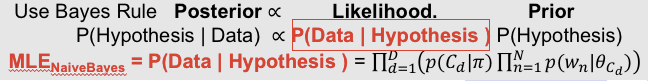

As seen above, naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naive) conditional independence assumptions between the features.  Naive Bayes classifiers are highly scalable, requiring the learning of  a number of parameters that is linear in the number of variables (features/predictors).  Learning these parameters, corresponding to probabilities takes a single pass of the training data, is linear in time, in contrast to the expensive iterative approximation (such as gradient descent) as used for many other types of classifiers.  

In this section will derive from scratch the closed-form expression for learning a Naive Bayes model. First, we set up some useful definitions.



## Definition 1: Naive Bayes (NB) Model:
A NB model consists of an integer $K$ specifying the number of possible labels, an integer $n$ specifying the number of attributes, and in addition the following classes of parameters:

*  Class prior parameters $Pr(Y=y)$  for any $y \in {1, \dots, K}$. The parameter $Pr(Y=y)$ can be interpreted as the probability of seeing the label $y$. We have the constraints on this parameter:
   * $Pr(Y=y) \ge0$ 
   * and $\sum^k_{y=1}Pr(Y=y_i) = 1$.
* And univariate class conditionals  $Pr(x_j|C_k)$ for any $j \in {1, \dots, n}$ and $k \in {1, \dots, K}$. The value for $Pr(x_j|y_k)$  can be interpreted as the probability of attribute $j$ taking value $x$, conditioned on the underlying label being $y$. For multinomial models, these class conditionals values  have the constraints such that: 

    * For each class $y_k$, the  $Pr(x_j|y_k) \ge 0$ and $\sum^n_{j=1}Pr(x_j|y_k) =1 $

### Calculate class posterior probability 
Given a Naive Bayes model we can calculate the posterior probability for any object, $(x_1, \dots, x_n)$, for any class $Y=y_k$ as follows:


$$
\begin{aligned} 
p(Y = y_k \mid x_1, \dots, x_n)
&=\frac{ p( x_1, \dots, x_n\mid Y = y_k)p(Y = y_k) }{p( x_1, \dots, x_n)}\\
&=\frac{  \prod_{i=1}^n p(x_i \mid Y = y_k)p(Y = y_k) }{p( x_1, \dots, x_n)}
\end{aligned}
$$

For the purposes of obtaining a class withOUT the probability, this calculation can be simplified as follows (drop the denominator as it is common to  posterior probability calculation for every class.

$$
\begin{aligned}
p(Y=y_k \mid x_1, \dots, x_n)
& \varpropto p(Y = y_k, x_1, \dots, x_n) \\
& \varpropto p(Y = y_k) \ p(x_1 \mid Y = y_k) \ p(x_2 \mid Y = y_k) \ p(x_3 \mid Y = y_k) \ \cdots \\
& \varpropto p(Y = y_k) \prod_{i=1}^n p(x_i \mid Y = y_k) \,.
\end{aligned}
$$


The next section describes how the parameters can be estimated from training examples. Once the parameters have been estimated, given a new test example $(x_1, \dots, x_n)$, the the Naive Bayes Classifier assigns a class label $\hat{Y} = C_k$for some $k$ as follows:

$$\hat{y} = \underset{k \in \{1, \ldots, K\}}{\operatorname{argmax}} \ p(Y=y_k) \displaystyle\prod_{i=1}^n p(x_i \mid Y=y_k)$$


## Estimating the parameters of a  Naive Bayes Model via Maximum-Likelihood


Given that the naive Bayes classifier outputs a probability for all classes with respect to each example. Zooming in further on the the ground truth class of each example and taking each of these posterior probabilities, we can calculate the joint probability of the observed data as follows:

For a multinomial model, we need to learn two types of models parameters:

* likelihood: the probabilities of each word given the document class $P(x_i||Y=y_k)$, 
* and the class priors: the prior probabilities $P(Y=y_k)$. 

Let's first,  revisit the form of the estimates, and then go into some detail about how the estimates are derived. The maximum likelihood  estimate of the likelihood parameters from a training set $D$ consisting of, say, $m$  examples, ${((X^{(1)}, y^{(1)}), \dots, (X^m, y^{(m)}))}$, can be calculated as follows: 

$$
p(x_i \mid Y = y_k) =  \frac{(\sum_{j=1}^m freq(x^{(j)}_{ik}))}{(\sum_{j=1}^m \sum_{g=1}^n freq(^{(j)}_{gk}))}
$$


Assuming we are working with a text classification problem, where where documents consists of the se
t of words for features, then $\sum_{j=1}^m freq(x^{(j)}_{jk}))$ is the number of times that word $x_i$ occurs across all examples documents of class $k$. And  $  \frac{(\sum_{j=1}^m freq(x^{(j)}_{ik}))}{(\sum_{j=1}^m \sum_{g=1}^n freq(^{(j)}_{gk}))}$ denotes the relative frequency of word $x_i$ across all documents for class $k$. Think in terms of doing a word count of all the documents for a class and computing the relative frequency of each term from the resulting frequncy distribution. 

Similarly, the maximum likelihood  estimate of the  class priors can be calculated as follows:


$$
p(Y = y_k) =  \frac{(\sum_{i=1}^m (\text{if } Y_i==y_k: 1 \text{ else: } 0))}{m}
$$

This is simply the number of times that the label y_k is seen in the training set divided by the number of training examples, $m$.

## Deriving  Maximum-Likelihood Estimates

Consider a training data set of the form ${(X^{(1)}, y^{(1)}, \dots, (X^{(m)}, y^{(m)})}$, where each $X^{(i)}$ is a an $n$-dimensional vector, and $y^{(i)}$ is the true label (aka ground truth label) of the corresponding example. Given a (learnt) Naive Bayes model one can calculate a posterior probability for the ground truth class of each training example (as was defined above and presented here in context for convenience) as follows:


$$
\begin{aligned} 
p(Y = y^{(i)} \mid x^{(i)}_1, \dots, x^{(i)}_n)
&=\frac{ p(Y = y^{(i)}) p( x^{(i)}_1, \dots, x^{(i)}_n\mid Y = y^{(i)}) }{p( x^{(i)}_1, \dots, x^{(i)}_n)}\\
&=\frac{  p(Y = y^{(i)}) \prod_{i=1}^n p(x^{(i)}_i \mid Y = y^{(i)}) }{p( x^{(i)}_1, \dots, x^{(i)}_n)}
\end{aligned}
$$

Let's assume the training data are independently sampled from the same distribution; this is known as the *iid assumption*, which stands for “independent and identically distributed”. Given an IID dataset, we can estimate the joint probability of the dataset as a function of the parameters of the learnt model as follows using the class posterior probability associated with the ground truth class of each training example:

$$\begin{aligned}
P(D|\theta) &= \prod_{i = 1}^m p(Y = y^{(i)} \mid x^{(i)}_1, \dots, x^{(i)}_n) \\
&= \prod_{i = 1}^m \frac{p(Y = y^{(i)}) \prod_{i=1}^n p(x^{(i)}_i \mid Y = y^{(i)})} {p( x^{(i)}_1, \dots, x^{(i)}_n)}
\end{aligned} $$

We refer to this joint probability distribution, $P(D|\theta)$, as the **(conditional) likelihood  $L(\theta)$**.  Here for convenience we use  $\theta$ to refer to a parameter vector consisting of values in the model
for all parameters $Pr(C_j)$ and $Pr(x_{ij|C = y_j})$ for $j \in [1,\dots, K]$ and $i\in{1, \dots, n}$. *The likelihood is a function of the parameter values, and the training examples.* We usually work with the **log likelihood** (because of numerical underflow issues), which is given by:

$$\begin{aligned}
LL(\theta) \triangleq \log P(D|\theta) &= \sum_{i = 1}^m log P(y^{(i)} | x^{(i)}) \\
\end{aligned} $$

Here $\triangleq$ denotes *"is defined by"*. This decomposes into a sum of terms, one per example. Generally, we wish to maximize this quantity, i.e., for each example, we would desire for $p(Y = y^{(i)} \mid x^{(i)}_1, \dots, x^{(i)}_n)$ to be maximum (or as close to 1 as possible for the ground truth class). This then leads to Maximum Likelihood Estimation (MLE) objective function that is given by:

$$ {\hat {\theta }}_{MLE}= \arg\max_{\theta; D}\sum_{i = 1}^m log P(y^{(i)} | x^{(i)}) $$


Since most optimization algorithms and software implementations are designed to minimize
objective functions,  the MLE objective function is flipped to a minimization problem, commonly known as the (conditional) negative log likelihood or NLL as follows:


$${NLL ({\theta }; D)}  \triangleq -\log p(D|\theta) = -  \sum_{i = 1}^m log P(y^{(i)} | x^{(i)}) $$

Minimizing this will also give the maximum likelihood estimate (MLE) of the model parameters. 


$$ {\hat {\theta }}_{MLE}= \arg\min_{\theta; D} - \sum_{i = 1}^m log P(y^{(i)} | x^{(i)}) 
\label{eq:MLE_cond} \tag{1}
$$

In Equation $\eqref{eq:MLE_cond}$, Vector $\theta$  refers  Naive Bayes model parameters $Pr(C_j)$ and $Pr(x_{ij|C = y_j})$ for $j \in [1,\dots, K]$ and $i\in{1, \dots, n}$.

As an aside, if the model is unconditional (unsupervised, as in, say,  the case of the EM clustering algorithm), the MLE becomes:

$$ {\hat {\theta }}_{MLE}= \arg\min_{\theta; D} - \sum_{i = 1}^m log P(x^{(i)}, \theta) 
\label{eq:MLE_uncond} \tag{2}
$$

In summary, [maximum likelihood estimation (MLE)](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation) is a method of estimating the parameters of a model (of probability distributions in the case of Naive Bayes machine learnt model) by maximizing a likelihood function, so that under the assumed statistical model the observed data is most probable (i.e., the joint probability of the data is highest given by the likelihood function). The model, a point in the parameter space, that maximizes the likelihood function is called the maximum likelihood estimate. The logic of maximum likelihood is both intuitive and flexible, and as such the method has become a dominant means of statistical inference (think machine learning).

Most machine learning algorithms can be reframed probabilistically to leverage the maximum likelihood estimation framework. If the likelihood function is differentiable, the derivative test for determining minima (or maxima) can be applied. In some cases, the first-order conditions of the likelihood function can be solved explicitly in closed form. For instance:

* The normal eqaution is a closed form solution to the ordinary least squares estimator that maximizes the likelihood of the linear regression model. 
* The estimates for the class prior and the class conditionals in the case of learning a Naive Bayes model are a closed form solution that maximizes the likelihood of the Naive Bayes model. 
  * In the case of Naive Bayes,  Maximum-likelihood training can be done by evaluating a closed-form expression  which takes linear time, rather than by expensive iterative approximation as used for many other types of classifiers.
* Logistic regression and deep learning frameworks for classification also fall under the maximum likelihood family (more that in next module).

Under some circumstances, however, numerical methods will be necessary to find the optimum of the likelihood function. 

From the vantage point of Bayesian inference (more on this later), MLE is a special case of maximum a posteriori estimation  (MAP) that assumes a uniform  prior distribution  of the parameters. In frequentist inference , MLE is a special case of an extremum estimator , with the objective function being the likelihood.

### Deriving MLE for Naive Bayes

Here we present how the maximum likelihood estimates for the class prior and the class conditionals are derived from maximizing the joint probability of the training being generated by the model. Here for convenience we use:
* $\theta$ to refer to a parameter vector consisting of values in the model
for all parameters $Pr(C_j)$ and $Pr(x_{ij|C = y_j})$ for $j \in [1,\dots, K]$ and $i\in{1, \dots, n}$. 
* and a training data set of the form ${((X^{(1)}, y^{(1)}), \dots, (X^{(m)}, y^{(m)}))}$, where each $X^{(i)}$ is a an $n$-dimensional vector, and $y^{(i)}$ is the true label (aka ground truth label) of the corresponding example. 

Given this as context the MLE objective function which was flipped to a minimization problem, commonly known as the (conditional) negative  likelihood or NLL  is given as follows:



$$\begin{align}
{\hat {\theta }}_{MLE}&= \arg\min_{\theta; D} - \sum_{i = 1}^m  P(y^{(i)} | x^{(i)}) \label{MLE_NB1}\tag{1}  \\ 
{\hat {\theta }}_{MLE} &=\arg\min_{\theta} -  \prod_{i = 1}^m p(Y = y^{(i)} \mid x^{(i)}_1, \dots, x^{(i)}_n) \label{MLE_NB2}\tag{2} \\
&= \arg\min_{\theta; D} -  \prod_{i = 1}^m \frac{p(Y = y^{(i)}) \prod_{j=1}^n p(x^{(i)}_j \mid Y = y^{(i)})} {p( x^{(i)}_1, \dots, x^{(i)}_n)} \label{MLE_NB3}\tag{3} \\
&= \arg\min_{\theta; D} -  \prod_{i = 1}^m {p(Y = y^{(i)}) \prod_{j=1}^n p(x^{(i)}_j \mid Y = y^{(i)})}  \label{MLE_NB4}\tag{4} \\
&= \arg\min_{\theta; D} - log \left[ \prod_{i = 1}^m {p(Y = y^{(i)}) \prod_{j=1}^n p(x^{(i)}_j \mid Y = y^{(i)})} \right] \label{MLE_NB5}\tag{5} \\
&= \arg\min_{\theta; D} -  \sum_{i = 1}^m log \left[{p(Y = y^{(i)}) \prod_{j=1}^n p(x^{(i)}_j \mid Y = y^{(i)})} \right] \label{MLE_NB6}\tag{6} \\
&= \arg\min_{\theta; D} -\left(\sum_{i = 1}^m log (p(Y = y^{(i)}))+ \sum_{i = 1}^m log \left[\prod_{j=1}^n p(x^{(i)}_j \mid Y = y^{(i)}) \right]\right) \label{MLE_NB7}\tag{7}\\
&= \arg\min_{\theta; D} -\left(\sum_{i = 1}^m log (p(Y = y^{(i)}))+ \sum_{i = 1}^m \sum_{j = 1}^n log  (p(x^{(i)}_j \mid Y = y^{(i)})) \right) \label{MLE_NB8}\tag{8}
\end{align} $$



 

In the above, the following log-based equivalences are used extensive:
* $log(a  + b) = log a + log b$ 
* $log(ab) = log a + log b$

As usual, the log-likelihood function $LL(\theta)$ can be interpreted as a measure of
how well the parameter values ${\hat {\theta }}_{MLE}$ fit the training example. In ML estimation we seek
the parameter values that minimize  $NLL(\theta; D)$.

The maximum-likelihood problem is the following:

$$\begin{align}
{\hat {\theta }}_{MLE}&= \arg\min_{\theta; D} -\left(\sum_{i = 1}^m log (p(Y = y^{(i)}))+ \sum_{i = 1}^m \sum_{j = 1}^n log  (p(x^{(i)}_j \mid Y = y^{(i)})) \right) \label{MLE_NB8}\tag{8}
\end{align} $$

Subject to constraints on the prior $\theta_{priors}$:
* $Pr(Y=y) \ge0$ 
* and $\sum^k_{y=1}Pr(Y=y_i) = 1$.

And for multinomial models, these class conditionals values $\theta_{class\_conditionals}$ have the constraints such that: 

* For each class $y_k$, the  $Pr(x_j|y_k) \ge 0$ and $\sum^n_{j=1}Pr(x_j|y_k) =1 $

We can fold these constraints into the objective function by introducing a Lagrange multipliers  corresponding to the constraints. The resulting Langrangian is beyond the scope of the his module. As such, we will proceed with a simplified gradient treatment. 

Note, that taking the log of the likelihood objective function (with no Langrangian terms) as shown above allows to us to decompose the likelihood into the two separate parts of your model:

* the first term that contains only prior parameters $\theta_{priors}$
* and the second terms that contains the class conditionals $\theta_{class\_conditionals}$. 

Thus, taking the derivative with respect to one of the parameters types eliminates the other one. To find the the values of $\theta_{prior}$  and $\theta_{class\_conditionals}$ that minimize the likelihood function, take the derivative with respect to each and solve for zero:

$$\begin{align}
\frac{\partial{NLL ({\theta }; D)}}{\partial\theta}  &= \frac{\partial \left(-\left(\sum_{i = 1}^m log (p(Y = y^{(i)}))+ \sum_{i = 1}^m \sum_{j = 1}^n log  (p(x^{(i)}_j \mid Y = y^{(i)})) \right) \right) } {\partial\theta}\label{MLE_NBG1}\tag{1}
\end{align}$$

This leads to the maximum likelihood estimates for a multinomial model  for  the prior parameters $\theta_{priors}$ and for the class conditionals $\theta_{class\_conditionals}$ as follows:


$$\begin{align}
\hat{\theta}_{priors} &=  p(Y = y_k) &=  \frac{(\sum_{i=1}^m (\text{if } Y_i==y_k: 1 \text{ else: } 0))}{m} \label{MLE_NBG2}\tag{2}\\
\hat{\theta}_{class\_conditionals} &=  p(x_i \mid Y = y_k) &=  \frac{(\sum_{j=1}^m freq(x^{(j)}_{ik}))}{(\sum_{j=1}^m \sum_{g=1}^n freq(^{(j)}_{gk}))} \label{MLE_NBG3}\tag{3}
\end{align}$$

A similar approach can be taken derive the maximum likelihood estimates for the parameters of the Bernouilli and Gaussians models.



## Algorithm for Learning a Naive Bayes Classifier with +1 smoothing for text-based examples

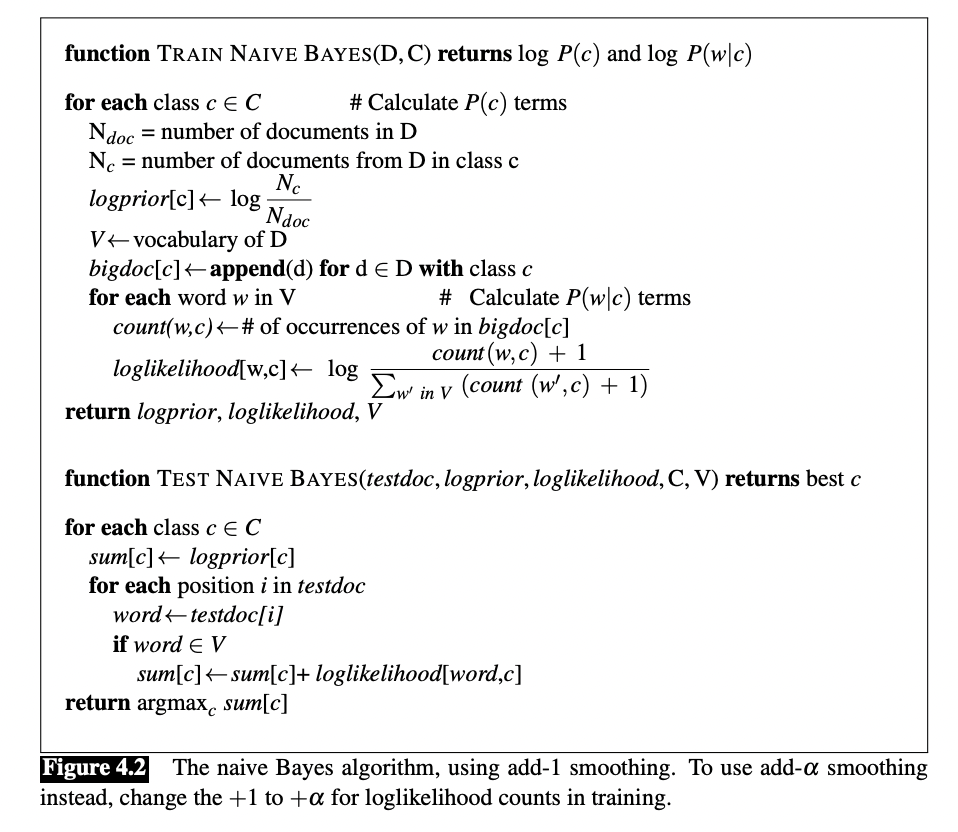

This image is adapted from [Speech and Language Processing (3rd ed. draft) Dan Jurafsky and James H. Martin](https://web.stanford.edu/~jurafsky/slp3/). This is an excellent book on machine learning and language-based applications to have on your bookshelf. 

# Optimizing the smoothing parameter for a Naive Bayes Classifier: SPAM detection case study
A summary of this case study is presentd in the image below. For more details please see [here](https://www.dropbox.com/s/rbceyfvsv5yp2yk/0214-Princeton-MLE-for-NaiveBayes.pdf?dl=0)

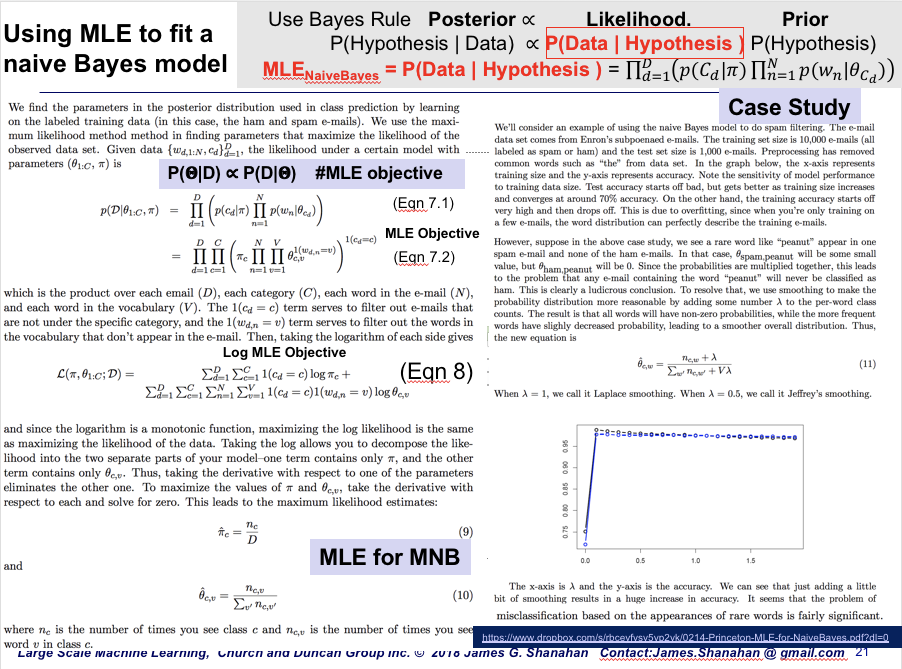

# Representing text as numerical data --> doc-term matrix

In [10]:
# example text for model training (SMS messages)
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

From the [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction):

> Text Analysis is a major application field for machine learning algorithms. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect **numerical feature vectors with a fixed size** rather than the **raw text documents with variable length**.

We will use [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to "convert text into a matrix of token counts":

In [11]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [12]:
# learn the 'vocabulary' of the training data (occurs in-place)
vect.fit(simple_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [13]:
# examine the fitted vocabulary
vect.get_feature_names()

['cab', 'call', 'me', 'please', 'tonight', 'you']

In [14]:
# transform training data into a 'document-term matrix'
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']
simple_train_dtm = vect.transform(simple_train)
simple_train_dtm

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [15]:
# convert sparse matrix to a dense matrix
simple_train_dtm.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]])

In [16]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names())
# example text for model training (SMS messages)
#simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

cab  call  me  please  tonight  you
0    0     1   0       0        1    1
1    1     1   1       0        0    0
2    0     1   1       2        0    0

From the [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction):

> In this scheme, features and samples are defined as follows:

> - Each individual token occurrence frequency (normalized or not) is treated as a **feature**.
> - The vector of all the token frequencies for a given document is considered a multivariate **sample**.

> A **corpus of documents** can thus be represented by a matrix with **one row per document** and **one column per token** (e.g. word) occurring in the corpus.

> We call **vectorization** the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the **Bag of Words** or "Bag of n-grams" representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

In [17]:
# check the type of the document-term matrix
type(simple_train_dtm)

scipy.sparse.csr.csr_matrix

In [18]:
# examine the sparse matrix contents
print(simple_train_dtm)

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


From the [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction):

> As most documents will typically use a very small subset of the words used in the corpus, the resulting matrix will have **many feature values that are zeros** (typically more than 99% of them).

> For instance, a collection of 10,000 short text documents (such as emails) will use a vocabulary with a size in the order of 100,000 unique words in total while each document will use 100 to 1000 unique words individually.

> In order to be able to **store such a matrix in memory** but also to **speed up operations**, implementations will typically use a **sparse representation** such as the implementations available in the `scipy.sparse` package.

In [19]:
# example text for model testing
simple_test = ["please don't call me"]

In order to **make a prediction**, the new observation must have the **same features as the training observations**, both in number and meaning.

In [20]:
# transform testing data into a document-term matrix (using existing vocabulary)
simple_test_dtm = vect.transform(simple_test)
simple_test_dtm.toarray()

array([[0, 1, 1, 1, 0, 0]])

In [21]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(simple_test_dtm.toarray(), columns=vect.get_feature_names())

cab  call  me  please  tonight  you
0    0     1   1       1        0    0

**Summary:**

- `vect.fit(train)` **learns the vocabulary** of the training data
- `vect.transform(train)` uses the **fitted vocabulary** to build a document-term matrix from the training data
- `vect.transform(test)` uses the **fitted vocabulary** to build a document-term matrix from the testing data (and **ignores tokens** it hasn't seen before)

# Full Case study on Spam SMS dataset PLUS intro to text processing

## Reading an SMS text dataset into pandas

Read in a small SMS-based corpus of text messages that have been classified as SPAM or HAM.

In [6]:
print(f"{1e-10*10**10}")

1.0


In [22]:
# read file into pandas using a relative path
path = 'data/sms.tsv'
sms = pd.read_table(path, header=None, names=['label', 'message'])

In [23]:
# alternative: read file into pandas from a URL
# url = 'https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv'
# sms = pd.read_table(url, header=None, names=['label', 'message'])

In [24]:
# examine the shape
sms.shape

(5572, 2)

In [25]:
# examine the first 10 rows
sms.head(10)

label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...

In [26]:
# examine the class distribution
sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [27]:
# convert label to a numerical variable
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})

In [28]:
# check that the conversion worked
sms.head(10)

label                                            message  label_num
0   ham  Go until jurong point, crazy.. Available only ...          0
1   ham                      Ok lar... Joking wif u oni...          0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...          1
3   ham  U dun say so early hor... U c already then say...          0
4   ham  Nah I don't think he goes to usf, he lives aro...          0
5  spam  FreeMsg Hey there darling it's been 3 week's n...          1
6   ham  Even my brother is not like to speak with me. ...          0
7   ham  As per your request 'Melle Melle (Oru Minnamin...          0
8  spam  WINNER!! As a valued network customer you have...          1
9  spam  Had your mobile 11 months or more? U R entitle...          1

In [29]:
# how to define X and y (from the iris data) for use with a MODEL
X = iris.data
y = iris.target
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [30]:
# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
X = sms.message
y = sms.label_num
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [32]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)
(4179,)
(1393,)


## Vectorizing the SMS dataset

In [33]:
# instantiate the vectorizer
vect = CountVectorizer()

In [34]:
# learn training data vocabulary, then use it to create a document-term matrix
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)

In [35]:
# equivalently: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)

In [36]:
# examine the document-term matrix
X_train_dtm

<4179x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 55209 stored elements in Compressed Sparse Row format>

In [37]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 17604 stored elements in Compressed Sparse Row format>

## Building a Multinomial NB via sklearn

We will use [multinomial Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html):

> The multinomial Naive Bayes classifier is suitable for classification with **discrete features** (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [28]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()  #alpha = 1  for laplace smoothing

In [39]:
# train the model using X_train_dtm (document by term matrix) (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

CPU times: user 3.07 ms, sys: 1.63 ms, total: 4.7 ms
Wall time: 8.88 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Evaluate the learn MNB classifier


In [40]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [41]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.98851399856424982

In [42]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[1203,    5],
       [  11,  174]])

In [43]:
# print message text for the false positives (ham incorrectly classified as spam)
X_test[y_test < y_pred_class]

574               Waiting for your call.
3375             Also andros ice etc etc
45      No calls..messages..missed calls
3415             No pic. Please re-send.
1988    No calls..messages..missed calls
Name: message, dtype: object

In [44]:
# print message text for the false negatives (spam incorrectly classified as ham)
X_test[y_test > y_pred_class]

3132    LookAtMe!: Thanks for your purchase of a video...
5       FreeMsg Hey there darling it's been 3 week's n...
3530    Xmas & New Years Eve tickets are now on sale f...
684     Hi I'm sue. I am 20 years old and work as a la...
1875    Would you like to see my XXX pics they are so ...
1893    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
4298    thesmszone.com lets you send free anonymous an...
4949    Hi this is Amy, we will be sending you a free ...
2821    INTERFLORA - It's not too late to order Inter...
2247    Hi ya babe x u 4goten bout me?' scammers getti...
4514    Money i have won wining number 946 wot do i do...
Name: message, dtype: object

In [45]:
# example false negative
X_test[3132]

"LookAtMe!: Thanks for your purchase of a video clip from LookAtMe!, you've been charged 35p. Think you can do better? Why not send a video in a MMSto 32323."

In [46]:
# calculate predicted probabilities for X_test_dtm (poorly calibrated)
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([  2.87744864e-03,   1.83488846e-05,   2.07301295e-03, ...,
         1.09026171e-06,   1.00000000e+00,   3.98279868e-09])

In [47]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.98664310005369615

## Comparing MNB with a logistic regression

We will compare multinomial Naive Bayes with [logistic regression](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression):

> Logistic regression, despite its name, is a **linear model for classification** rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

In [48]:
# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [49]:
# train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)

CPU times: user 159 ms, sys: 29.8 ms, total: 189 ms
Wall time: 250 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

In [51]:
# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([ 0.01269556,  0.00347183,  0.00616517, ...,  0.03354907,
        0.99725053,  0.00157706])

In [52]:
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

0.9877961234745154

In [53]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.99368176123143015

## Examining a MNB model internal probabilities

We will examine the our **trained Naive Bayes model** to calculate the approximate **"spamminess" of each token**.

### Get the vocabulary of the Training data

In [54]:
# store the vocabulary of X_train
X_train_tokens = vect.get_feature_names()
len(X_train_tokens)

7456

In [55]:
# examine the first 50 tokens
print(X_train_tokens[0:50])

['00', '000', '008704050406', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703', '0578', '06', '07', '07008009200', '07090201529', '07090298926', '07123456789', '07732584351', '07734396839', '07742676969', '0776xxxxxxx', '07781482378', '07786200117', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '07880867867', '0789xxxxxxx', '07946746291', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '08', '0800', '08000407165', '08000776320', '08000839402', '08000930705']


In [56]:
# examine the last 50 tokens
print(X_train_tokens[-50:])

['yer', 'yes', 'yest', 'yesterday', 'yet', 'yetunde', 'yijue', 'ym', 'ymca', 'yo', 'yoga', 'yogasana', 'yor', 'yorge', 'you', 'youdoing', 'youi', 'youphone', 'your', 'youre', 'yourjob', 'yours', 'yourself', 'youwanna', 'yowifes', 'yoyyooo', 'yr', 'yrs', 'ything', 'yummmm', 'yummy', 'yun', 'yunny', 'yuo', 'yuou', 'yup', 'zac', 'zaher', 'zealand', 'zebra', 'zed', 'zeros', 'zhong', 'zindgi', 'zoe', 'zoom', 'zouk', 'zyada', 'èn', '〨ud']


In [57]:
# Naive Bayes counts the number of times each token appears in each class
nb.feature_count_

array([[  0.,   0.,   0., ...,   1.,   1.,   1.],
       [  5.,  23.,   2., ...,   0.,   0.,   0.]])

In [58]:
# rows represent classes, columns represent tokens
nb.feature_count_.shape

(2, 7456)

In [59]:
# number of times each token appears across all HAM messages
ham_token_count = nb.feature_count_[0, :]
ham_token_count

array([ 0.,  0.,  0., ...,  1.,  1.,  1.])

In [60]:
# number of times each token appears across all SPAM messages
spam_token_count = nb.feature_count_[1, :]
spam_token_count

array([  5.,  23.,   2., ...,   0.,   0.,   0.])

In [61]:
# create a DataFrame of tokens with their separate ham and spam counts
tokens = pd.DataFrame({'token':X_train_tokens, 'ham':ham_token_count, 'spam':spam_token_count}).set_index('token')
tokens.head()

ham  spam
token                  
00            0.0   5.0
000           0.0  23.0
008704050406  0.0   2.0
0121          0.0   1.0
01223585236   0.0   1.0

In [62]:
# examine 5 random DataFrame rows
tokens.sample(5, random_state=6)

ham  spam
token                   
very          64.0   2.0
nasty          1.0   1.0
villa          0.0   1.0
beloved        1.0   0.0
textoperator   0.0   2.0

In [63]:
# Naive Bayes counts the number of observations in each class
nb.class_count_

array([ 3617.,   562.])

Before we can calculate the "spamminess" of each token, we need to avoid **dividing by zero** and account for the **class imbalance**.

In [64]:
# add 1 to ham and spam counts to avoid dividing by 0
tokens['ham'] = tokens.ham + 1
tokens['spam'] = tokens.spam + 1
tokens.sample(5, random_state=6)

ham  spam
token                   
very          65.0   3.0
nasty          2.0   2.0
villa          1.0   2.0
beloved        2.0   1.0
textoperator   1.0   3.0

In [65]:
# convert the ham and spam counts into frequencies
tokens['ham'] = tokens.ham / nb.class_count_[0]
tokens['spam'] = tokens.spam / nb.class_count_[1]
tokens.sample(5, random_state=6)

ham      spam
token                           
very          0.017971  0.005338
nasty         0.000553  0.003559
villa         0.000276  0.003559
beloved       0.000553  0.001779
textoperator  0.000276  0.005338

In [66]:
# calculate the ratio of spam-to-ham for each token
tokens['spam_ratio'] = tokens.spam / tokens.ham
tokens.sample(5, random_state=6)

ham      spam  spam_ratio
token                                       
very          0.017971  0.005338    0.297044
nasty         0.000553  0.003559    6.435943
villa         0.000276  0.003559   12.871886
beloved       0.000553  0.001779    3.217972
textoperator  0.000276  0.005338   19.307829

In [67]:
# examine the DataFrame sorted by spam_ratio
# note: use sort() instead of sort_values() for pandas 0.16.2 and earlier
tokens.sort_values('spam_ratio', ascending=False)

ham      spam  spam_ratio
token                                     
claim       0.000276  0.158363  572.798932
prize       0.000276  0.135231  489.131673
150p        0.000276  0.087189  315.361210
tone        0.000276  0.085409  308.925267
guaranteed  0.000276  0.076512  276.745552
18          0.000276  0.069395  251.001779
cs          0.000276  0.065836  238.129893
www         0.000553  0.129893  234.911922
1000        0.000276  0.056940  205.950178
awarded     0.000276  0.053381  193.078292
150ppm      0.000276  0.051601  186.642349
uk          0.000553  0.099644  180.206406
500         0.000276  0.048043  173.770463
ringtone    0.000276  0.044484  160.898577
000         0.000276  0.042705  154.462633
mob         0.000276  0.042705  154.462633
co          0.000553  0.078292  141.590747
collection  0.000276  0.039146  141.590747
valid       0.000276  0.037367  135.154804
2000        0.000276  0.037367  135.154804
800         0.000276  0.037367  135.154804
10p         0.000276  0.037367  135.154804
8007        0.000276  0.035587  128.718861
16          0.000553  0.067616  122.282918
weekly      0.000276  0.033808  122.282918
tones       0.000276  0.032028  115.846975
land        0.000276  0.032028  115.846975
http        0.000276  0.032028  115.846975
national    0.000276  0.030249  109.411032
5000        0.000276  0.030249  109.411032
...              ...       ...         ...
went        0.012718  0.001779    0.139912
ll          0.052530  0.007117    0.135494
told        0.013824  0.001779    0.128719
feel        0.013824  0.001779    0.128719
gud         0.014100  0.001779    0.126195
cos         0.014929  0.001779    0.119184
but         0.090683  0.010676    0.117731
amp         0.015206  0.001779    0.117017
something   0.015206  0.001779    0.117017
sure        0.015206  0.001779    0.117017
ok          0.061100  0.007117    0.116488
said        0.016312  0.001779    0.109084
morning     0.016865  0.001779    0.105507
yeah        0.017694  0.001779    0.100562
lol         0.017694  0.001779    0.100562
anything    0.017971  0.001779    0.099015
my          0.150401  0.014235    0.094646
doing       0.019077  0.001779    0.093275
way         0.019630  0.001779    0.090647
ask         0.019630  0.001779    0.090647
already     0.019630  0.001779    0.090647
too         0.021841  0.001779    0.081468
come        0.048936  0.003559    0.072723
later       0.030688  0.001779    0.057981
lor         0.032900  0.001779    0.054084
da          0.032900  0.001779    0.054084
she         0.035665  0.001779    0.049891
he          0.047000  0.001779    0.037858
lt          0.064142  0.001779    0.027741
gt          0.064971  0.001779    0.027387

[7456 rows x 3 columns]

In [68]:
# look up the spam_ratio for a given token
tokens.loc['dating', 'spam_ratio']

83.667259786476862

# Tuning the vectorizer (discussion)

Thus far, we have been using the default parameters of [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html):

In [69]:
# show default parameters for CountVectorizer
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

However, the vectorizer is worth tuning, just like a model is worth tuning! Here are a few parameters that you might want to tune:

- **stop_words:** string {'english'}, list, or None (default)
    - If 'english', a built-in stop word list for English is used.
    - If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens.
    - If None, no stop words will be used.

In [70]:
# remove English stop words
vect = CountVectorizer(stop_words='english')

- **ngram_range:** tuple (min_n, max_n), default=(1, 1)
    - The lower and upper boundary of the range of n-values for different n-grams to be extracted.
    - All values of n such that min_n <= n <= max_n will be used.

In [71]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))

- **max_df:** float in range [0.0, 1.0] or int, default=1.0
    - When building the vocabulary, ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words).
    - If float, the parameter represents a proportion of documents.
    - If integer, the parameter represents an absolute count.

In [72]:
# ignore terms that appear in more than 50% of the documents
vect = CountVectorizer(max_df=0.5)

- **min_df:** float in range [0.0, 1.0] or int, default=1
    - When building the vocabulary, ignore terms that have a document frequency strictly lower than the given threshold. (This value is also called "cut-off" in the literature.)
    - If float, the parameter represents a proportion of documents.
    - If integer, the parameter represents an absolute count.

In [73]:
# only keep terms that appear in at least 2 documents
vect = CountVectorizer(min_df=2)

**Guidelines for tuning CountVectorizer:**

- Use your knowledge of the **problem** and the **text**, and your understanding of the **tuning parameters**, to help you decide what parameters to tune and how to tune them.
- **Experiment**, and let the data tell you the best approach!

# SMS dataset using Naive Bayes in Pipeline

In [60]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [61]:
# reload original dataset
path = 'data/sms.tsv'
sms = pd.read_table(path, header=None, names=['label', 'message'])
sms.head(5)

label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [62]:
# convert text target classes to numerical target classes
lb = LabelBinarizer()
sms['label'] = lb.fit_transform(sms['label'])

In [63]:
# separate features and targets
X = sms.message
y = sms.label

# create splits 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

##### CountVectorizer digression
```python
ngram_rangetuple (min_n, max_n), default=(1, 1)
```

The lower and upper boundary of the range of n-values for different word n-grams or char n-grams to be extracted. All values of n such such that min_n <= n <= max_n will be used. For example an ngram_range of $(1, 1)$ means only unigrams, $(1, 2)$ means unigrams and bigrams, and $(2, 2)$ means only bigrams. Only applies if analyzer is not callable.


For more background on CountVectorizer see [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

```python
max_df  float in range [0.0, 1.0] or int, default=1.0
```
When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.



In [64]:
%%time 



params = {'dtm__ngram_range':[(1,1), (1,2), (1,3), (2,2), (2,3), (2,4)],
          'dtm__max_df':[.3, .4, .5, .6],
          'dtm__min_df':list(range(0,10,2)),
         }

pipe = Pipeline([('dtm', CountVectorizer()),
                ('mnb', MultinomialNB())
                ])

gs = GridSearchCV(pipe, params, cv=5, verbose=1, n_jobs=-1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   31.9s


CPU times: user 2.37 s, sys: 450 ms, total: 2.82 s
Wall time: 46.3 s


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   46.1s finished


In [65]:
res = pd.DataFrame(columns=['Model','Accuracy','F1'])
y_pred = gs.predict(X_train)
acc = accuracy_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
res.loc[len(res)] = ['GS GaussianNB (train)', acc, f1]
res

Model  Accuracy        F1
0  GS GaussianNB (train)  0.989487  0.960155

In [66]:
y_pred = gs.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
res.loc[len(res)] = ['GS GaussianNB (test)', acc, f1]
res

Model  Accuracy        F1
0  GS GaussianNB (train)  0.989487  0.960155
1   GS GaussianNB (test)  0.985646  0.946903

In [67]:
gs.best_estimator_

Pipeline(memory=None,
     steps=[('dtm', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.3, max_features=None, min_df=2,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('mnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

# Image Classifier case study: CIFAR10

DOWNLOAD DATA FROM [HERE](http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz) AND PUT IT TO THE DATA FOLDER

The [CIFAR-10](http://www.cs.toronto.edu/~kriz/cifar.html) dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks. Such a situation is called **multiclass** classification in oppose to **multilabel** classification when each example may have multiple label.

One can see state-of-the-art results [here](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html)

In [11]:
import _pickle as cPickle
import tarfile

import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Set style for plotting

In [17]:
sns.set(style="whitegrid", font_scale=1.3)
matplotlib.rcParams["legend.framealpha"] = 1
matplotlib.rcParams["legend.frameon"] = True

Fix random seed for reproducibility

In [18]:
np.random.seed(42)

## Data

Unarchive data

In [20]:
tar = tarfile.open("data/cifar-10-python.tar.gz", "r:gz")
tar.extractall("data")
tar.close()

## Reading

Data are stored as a memory dump with python $\text{dict}$ object. It was created using **pickle** function. To read one should "unpickle" it.

In [21]:
def unpickle(file):
    fo = open(file, 'rb')
    dict = cPickle.load(fo, encoding="latin1")
    fo.close()
    return dict

Data are also splitted in to 5 pieces for conveniece. Let's read them all and concatenate

In [22]:
for b in range(1, 6):
    data_batch = unpickle("data/cifar-10-batches-py/data_batch_" + str(b))
    if b == 1:
        X_train = data_batch["data"]
        y_train = np.array(data_batch["labels"])
    else:
        X_train = np.append(X_train, data_batch["data"], axis=0)
        y_train = np.append(y_train, data_batch["labels"], axis=0)

Read test data. In this dataset train/test split is provided by authors of the dataset to be able to consistently evaluate solutions

In [23]:
data_batch = unpickle("data/cifar-10-batches-py/test_batch")
X_test = data_batch["data"]
y_test = np.array(data_batch["labels"])

Read meta-information file with the names of the classes

In [24]:
classes = unpickle("data/cifar-10-batches-py/batches.meta")["label_names"]

## Pre-processing

We have too many data

In [25]:
print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 50000
Test size: 10000


Let's take only 10% of them to train faster

In [26]:
subsample_rate = 0.1
np.random.seed(42)

We want to preserve the same quantity ratio between classes. In python such an option is called **stratification**. Let's randomly (with fixed initial seed for the sake of reproducibility) divide part of train data

In [27]:
X_train, _, y_train, _ = train_test_split(X_train, y_train, stratify=y_train, train_size=subsample_rate, random_state=42)

In [29]:
X_train.shape

(5000, 3072)

The same for test

In [ ]:
X_test, _, y_test, _ = train_test_split(X_test, y_test, stratify=y_test, train_size=subsample_rate, random_state=42)

Indeed, we preserved the number of objects of each class

In [ ]:
unique_train = np.unique(y_train, return_counts=True)
list(zip(np.array(classes)[unique_train[0]], unique_train[1]))

## Visualization

For now each object has the following shape

In [ ]:
X_train[0].shape

$3072 = 32 \times 32 \times 3$ where $32 \times 32$ is the size of the image in pixels and $3$ is the number of channels (RGB)

To show this array as an image let's reshape it in the needed from with the shape $(32, 32, 1)$

In [ ]:
def show_pic(x):
    plt.imshow(x.reshape((3, 32, 32)).transpose(1, 2, 0).astype("uint8"))
    plt.axis("off")

Draw one pic from each class

In [ ]:
classes_idx_examples = np.zeros(10, dtype=np.int)
for i in range(10):
    classes_idx_examples[i] = np.where(y_train == i)[0][0]

In [ ]:
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    show_pic(X_train[classes_idx_examples[i]])
    plt.title(classes[i])

# Image classifier via a Gaussian Naive Bayes model

Let's use Sklearn to build benchmark proabilistic classifiers.

Also one should **always** track the results of the experiments to be able to compare different approaches. Let's create pandas $\text{DataFrame}$ for this purpose.

**TASK: Run the code in this section, and report the test accuracy for Gaussian Naive Bayes and Multinomial Logistic Regression**

In [ ]:
# Simple table to track experimental results
results = pd.DataFrame(columns=["Model", "Test Accuracy"])

For now it is empty, but will be filled in later

In [ ]:
results

Before predicting, let's standardize the data first

In [97]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Gaussian Naive Bayes

Let's train our first probalistic image classifer, namely a Gaussian Naive Bayes model. Please check this link for the SKLearn documentaion page on Gaussian Naive Bayes:
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd

from sklearn.naive_bayes import GaussianNB

%matplotlib inline

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_test = gnb.predict(X_test)
acc = accuracy_score(y_test, y_pred_test)
results.loc[len(results)] = ["Gaussian Naive Bayes Sklearn", np.round(acc, 3)]
results

##  Multinomial Logistic Regression

Let's build our next probalistic classifier, namely Multinomial Logistic Regression based classifier. Logistic Regression will be covered in great detail in the next lecture. For completeness we provide some background on Logistic Regression, however, you are not required to read or understand the following details at this time. 

Sklearn implementation of LogRegression implies mandatory usage of regularization (it almost always works better with it preventing overfitting). We want to explore very basic LogRegression model thus to "disable" regularization we need to reduce its impact to almost zero. It can be done by setting regularization constant $\lambda$ to very small value (in sklearn we define inverse regularization constant $C = 1 / \lambda$ thus we need to make it big)

Here we use Sklearn $\text{LogisticRegression}$ with few options:
* $\text{multi_class} = \text{"multinomial"} -$we want to build softmax classifier (there are other ways of dealing with multiclass setting for Logistic Regression)
* $\text{C} = 10^6-$ for now we don't want to use regularization; $\text{C}$ is the inverse regularization constant which is $\text{C} = \frac{1}{\lambda}$; thus we should make $\text{C}$ big to turn off regulazrization
* $\text{solver} = \text{sag} -$ optimization algorithm to use; Stochastic Average Gradient. Stochastic Gradient Descent method gitters massively. This is due to the not very good approximation of gradient (only by one example). To neglect this error one can simply average gradient across last few steps; that is exectly what $\text{sag}$ does
* $\text{max_iter} = 15 -$ the number of passes over the training data (aka epochs)

In [ ]:
np.random.seed(42)
model_lr_sklearn = LogisticRegression(multi_class="multinomial", C=1e6, solver="sag", max_iter=15)
model_lr_sklearn.fit(X_train, y_train)
##Prediciton
y_pred_test = model_lr_sklearn.predict(X_test)
##Accuracy
y_pred_test = model_lr_sklearn.predict(X_test)
acc = accuracy_score(y_test, y_pred_test)
results.loc[len(results)] = ["LR Sklearn", np.round(acc, 3)]
results

Keeping table of results up-to-date

# The Great Classifier Race

## BG: Part 1: Pima Diabetes classification

It is important to compare the performance of multiple different machine learning algorithms
consistently. In this chapter you will discover how you can create a test harness to compare
multiple different machine learning algorithms in Python with scikit-learn. You can use this
test harness as a template on your own machine learning problems and add more and different
algorithms to compare. After completing this lesson you will know:

1. How to formulate an experiment to directly compare machine learning algorithms.
2. A reusable template for evaluating the performance of multiple algorithms on one dataset.
3. How to report and visualize the results when comparing algorithm performance.

In the example below six different classification
algorithms (some of which you will recognize!) are compared on a single dataset:

*  Logistic Regression
*  Linear Discriminant Analysis
*  k-Nearest Neighbors
*  Classification and Regression Trees
*  Naive Bayes
* Support Vector Machines.

The dataset is the Pima Indians onset of diabetes problem. The problem has two classes and
eight numeric input variables of varying scales. The 10-fold cross-validation procedure is used to
evaluate each algorithm, importantly configured with the same random seed to ensure that the
same splits to the training data are performed and that each algorithm is evaluated in precisely
the same way. Each algorithm is given a short name, useful for summarizing results afterward.

0  \
mean_fit_time                           0.001922   
std_fit_time                             0.00024   
mean_score_time                         0.000208   
std_score_time                          0.000024   
param_clf                   LogisticRegression()   
params             {'clf': LogisticRegression()}   
split0_test_score                       0.688312   
split1_test_score                       0.831169   
split2_test_score                       0.766234   
split3_test_score                       0.701299   
split4_test_score                       0.779221   
split5_test_score                       0.792208   
split6_test_score                       0.844156   
split7_test_score                       0.831169   
split8_test_score                       0.763158   
split9_test_score                       0.802632   
mean_test_score                         0.779956   
std_test_score                          0.050088   
rank_test_score                                1   

                                                       1  \
mean_fit_time                                   0.000938   
std_fit_time                                    0.000076   
mean_score_time                                 0.000172   
std_score_time                                  0.000014   
param_clf                   LinearDiscriminantAnalysis()   
params             {'clf': LinearDiscriminantAnalysis()}   
split0_test_score                               0.701299   
split1_test_score                               0.831169   
split2_test_score                               0.753247   
split3_test_score                               0.675325   
split4_test_score                               0.779221   
split5_test_score                               0.766234   
split6_test_score                               0.844156   
split7_test_score                               0.818182   
split8_test_score                               0.763158   
split9_test_score                               0.802632   
mean_test_score                                 0.773462   
std_test_score                                  0.051592   
rank_test_score                                        2   

                                                 2  \
mean_fit_time                             0.000568   
std_fit_time                              0.000034   
mean_score_time                           0.001663   
std_score_time                            0.000047   
param_clf                   KNeighborsClassifier()   
params             {'clf': KNeighborsClassifier()}   
split0_test_score                          0.61039   
split1_test_score                         0.844156   
split2_test_score                         0.701299   
split3_test_score                         0.714286   
split4_test_score                         0.766234   
split5_test_score                          0.74026   
split6_test_score                          0.74026   
split7_test_score                         0.883117   
split8_test_score                         0.710526   
split9_test_score                         0.723684   
mean_test_score                           0.743421   
std_test_score                            0.072108   
rank_test_score                                  5   

                                                   3                      4  \
mean_fit_time                               0.001945               0.000576   
std_fit_time                                0.000058               0.000029   
mean_score_time                             0.000196                 0.0002   
std_score_time                              0.000035               0.000016   
param_clf                   DecisionTreeClassifier()           GaussianNB()   
params             {'clf': DecisionTreeClassifier()}  {'clf': GaussianNB()}   
split0_test_score                           0.662338               0.675325   
split1_test_score                           0.779221               0.805195   
split2_test_s

0         1         2         3         4         5
split0_test_score  0.688312  0.701299   0.61039  0.662338  0.675325  0.688312
split1_test_score  0.831169  0.831169  0.844156  0.779221  0.805195  0.844156
split2_test_score  0.766234  0.753247  0.701299  0.688312  0.753247   0.74026
split3_test_score  0.701299  0.675325  0.714286  0.584416  0.714286  0.675325
split4_test_score  0.779221  0.779221  0.766234  0.688312  0.727273  0.779221
split5_test_score  0.792208  0.766234   0.74026  0.727273  0.766234  0.766234
split6_test_score  0.844156  0.844156   0.74026  0.753247  0.805195  0.805195
split7_test_score  0.831169  0.818182  0.883117  0.779221  0.818182  0.844156
split8_test_score  0.763158  0.763158  0.710526  0.631579  0.736842  0.710526
split9_test_score  0.802632  0.802632  0.723684  0.697368      0.75  0.789474

--------------------------------------------------


Model mean_acc std_acc
0    LR     0.78    0.05
1   LDA    0.773   0.052
2   KNN    0.743   0.072
3  CART    0.699    0.06
4   GNB    0.755   0.043
5   SVM    0.764   0.057

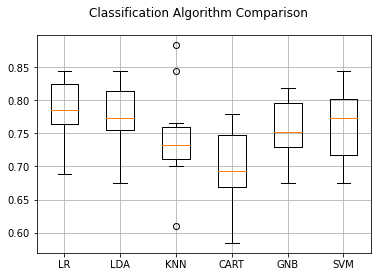

Best pipeline is Pipeline(steps=[('scale', StandardScaler()), ('clf', LogisticRegression())])
Best model is {'clf': LogisticRegression()}
test_acc on heldout test set by best pipeline is: 0.7337662337662337


In [46]:
# Compare Algorithms

import numpy as np
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# load dataset
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# prepare models
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size = 0.2, random_state=42)

# Create a pipeline
clf_pipe = Pipeline([('scale', StandardScaler()), ('clf', None)]) # Placeholder Estimator
    
# Candidate learning estimators
estimators = [{'clf': [LogisticRegression()]},
                {'clf': [LinearDiscriminantAnalysis()]},
                {'clf': [KNeighborsClassifier()]},
                {'clf': [DecisionTreeClassifier()]},
                {'clf': [GaussianNB()]},
                {'clf': [SVC()]},
               ]
ml_name = ['LR','LDA','KNN','CART','GNB','SVM']

clf_gridsearch = GridSearchCV(clf_pipe, param_grid = estimators, cv = 10, scoring='accuracy')
clf_gridsearch.fit(X, Y)

results_df = pd.DataFrame(clf_gridsearch.cv_results_)
results_df = results_df.T
display(results_df)
cv_by_model_test_scores=results_df.iloc[6:16, 0:len(ml_name)]
display(cv_by_model_test_scores)
print("-"*50)
display(pd.DataFrame(np.c_[ml_name, np.round(np.mean(cv_by_model_test_scores, 0), 3),
                           np.round(np.std(cv_by_model_test_scores, 0), 3)], 
                     columns=["Model", "mean_acc", "std_acc"]))
   
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Classification Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(cv_by_model_test_scores)
ax.set_xticklabels(ml_name)
pyplot.grid()
pyplot.show()


clf_pipeline = clf_gridsearch.best_estimator_
print("\n\n")
print("-"*60)
print(f"Best pipeline is {clf_pipeline}")
print(f"Best model is {clf_gridsearch.best_params_}")
y_pred = clf_pipeline.predict(X_test)
print(f"test_acc on heldout test set by best pipeline is: {accuracy_score(y_pred, y_test):.3f}")
print("\n\n")


Above we produced a box and whisker plot showing the spread of the accuracy scores
across each cross-validation fold for each algorithm.

From these results, it would suggest that both logistic regression and support vector machine classifies are perhaps worthy of further study on this problem.

## Task: CIFAR10 Great Race 
Repeat the above RACE for the CIFAR10 dataset and draw some conclusions. Complete the code below.

### Reload CIFAR-10 dataset

In [30]:
import _pickle as cPickle
import tarfile

import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

def unpickle(file):
    fo = open(file, 'rb')
    dict = cPickle.load(fo, encoding="latin1")
    fo.close()
    return dict

for b in range(1, 6):
    data_batch = unpickle("data/cifar-10-batches-py/data_batch_" + str(b))
    if b == 1:
        X_train = data_batch["data"]
        y_train = np.array(data_batch["labels"])
    else:
        X_train = np.append(X_train, data_batch["data"], axis=0)
        y_train = np.append(y_train, data_batch["labels"], axis=0)
        
data_batch = unpickle("data/cifar-10-batches-py/test_batch")
X_test = data_batch["data"]
y_test = np.array(data_batch["labels"])

classes = unpickle("data/cifar-10-batches-py/batches.meta")["label_names"]
np.random.seed(42)
subsample_rate = 0.02

#downsample training data
X_train, _, y_train, _ = train_test_split(X_train, y_train, stratify=y_train, train_size=subsample_rate, random_state=42)
#downsample testing data
X_test, _, y_test, _ = train_test_split(X_test, y_test, stratify=y_test, train_size=subsample_rate, random_state=42)

### Run Great Race on CIFAR-10 dataset

0  \
mean_fit_time                           0.002363   
std_fit_time                            0.000347   
mean_score_time                         0.000189   
std_score_time                          0.000026   
param_clf                   LogisticRegression()   
params             {'clf': LogisticRegression()}   
split0_test_score                       0.774194   
split1_test_score                       0.758065   
split2_test_score                       0.790323   
split3_test_score                       0.774194   
split4_test_score                       0.754098   
split5_test_score                       0.754098   
split6_test_score                       0.786885   
split7_test_score                       0.737705   
split8_test_score                       0.852459   
split9_test_score                       0.770492   
mean_test_score                         0.775251   
std_test_score                          0.029914   
rank_test_score                                3   

                                                       1  \
mean_fit_time                                   0.000844   
std_fit_time                                    0.000096   
mean_score_time                                  0.00018   
std_score_time                                  0.000025   
param_clf                   LinearDiscriminantAnalysis()   
params             {'clf': LinearDiscriminantAnalysis()}   
split0_test_score                               0.774194   
split1_test_score                               0.741935   
split2_test_score                               0.790323   
split3_test_score                               0.790323   
split4_test_score                               0.770492   
split5_test_score                               0.737705   
split6_test_score                               0.819672   
split7_test_score                               0.754098   
split8_test_score                               0.852459   
split9_test_score                               0.770492   
mean_test_score                                 0.780169   
std_test_score                                  0.033407   
rank_test_score                                        1   

                                                 2  \
mean_fit_time                             0.000453   
std_fit_time                              0.000011   
mean_score_time                            0.00139   
std_score_time                            0.000043   
param_clf                   KNeighborsClassifier()   
params             {'clf': KNeighborsClassifier()}   
split0_test_score                         0.774194   
split1_test_score                         0.725806   
split2_test_score                         0.758065   
split3_test_score                         0.806452   
split4_test_score                         0.655738   
split5_test_score                         0.688525   
split6_test_score                         0.754098   
split7_test_score                         0.721311   
split8_test_score                         0.770492   
split9_test_score                         0.803279   
mean_test_score                           0.745796   
std_test_score                            0.045835   
rank_test_score                                  5   

                                                   3                      4  \
mean_fit_time                               0.001657                0.00048   
std_fit_time                                0.000065               0.000032   
mean_score_time                             0.000178               0.000192   
std_score_time                              0.000013               0.000009   
param_clf                   DecisionTreeClassifier()           GaussianNB()   
params             {'clf': DecisionTreeClassifier()}  {'clf': GaussianNB()}   
split0_test_score                           0.612903               0.806452   
split1_test_score                           0.629032               0.725806   
split2_test_s

0         1         2         3         4         5  \
split0_test_score  0.774194  0.774194  0.774194  0.612903  0.806452  0.612903   
split1_test_score  0.758065  0.741935  0.725806  0.629032  0.725806   0.66129   
split2_test_score  0.790323  0.790323  0.758065  0.693548  0.725806  0.709677   
split3_test_score  0.774194  0.790323  0.806452  0.693548  0.806452  0.677419   
split4_test_score  0.754098  0.770492  0.655738  0.688525  0.721311  0.622951   
split5_test_score  0.754098  0.737705  0.688525  0.688525  0.770492  0.622951   
split6_test_score  0.786885  0.819672  0.754098  0.590164  0.786885  0.688525   
split7_test_score  0.737705  0.754098  0.721311  0.688525  0.721311  0.622951   
split8_test_score  0.852459  0.852459  0.770492  0.803279  0.852459  0.655738   
split9_test_score  0.770492  0.770492  0.803279  0.688525  0.754098  0.639344   

                          6  
split0_test_score  0.758065  
split1_test_score  0.758065  
split2_test_score  0.806452  
split3_test_score  0.806452  
split4_test_score  0.754098  
split5_test_score  0.721311  
split6_test_score  0.836066  
split7_test_score  0.737705  
split8_test_score  0.836066  
split9_test_score  0.770492

--------------------------------------------------


Model mean_acc std_acc
0    LR    0.775    0.03
1   LDA     0.78   0.033
2   KNN    0.746   0.046
3  CART    0.678   0.056
4   GNB    0.767   0.043
5   MNB    0.651   0.031
6   SVM    0.778   0.038

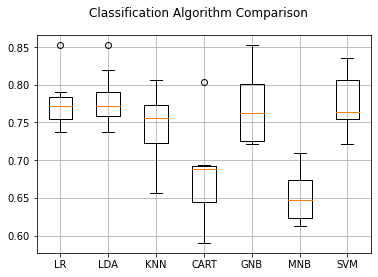




------------------------------------------------------------
Best pipeline is Pipeline(steps=[('scaler', MinMaxScaler()),
                ('clf', LinearDiscriminantAnalysis())])
Best model is {'clf': LinearDiscriminantAnalysis()}
test_acc on heldout test set by best pipeline is: 0.714





In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

# Create a pipeline
# do a min-max scaling
clf_pipe = Pipeline([("scaler", MinMaxScaler()), ('clf', None)]) # Placeholder Estimator
    
# Candidate learning estimators
estimators = [{'clf': [LogisticRegression()]},
                {'clf': [LinearDiscriminantAnalysis()]},
                {'clf': [KNeighborsClassifier()]},
                {'clf': [DecisionTreeClassifier()]},
                {'clf': [GaussianNB()]},
                {'clf': [MultinomialNB()]},
                {'clf': [SVC()]},
               ]

ml_name = ['LR','LDA','KNN','CART','GNB','MNB','SVM']

# Create grid search 

#==================================================#
#               Your code starts here              #
#==================================================#
# Create grid search using the pipeline and estimators as the parametes, 
#use cv = 10 and 'accuracy' for the scoring parameter
clf_gridsearch = GridSearchCV(clf_pipe, param_grid = estimators, cv = 10, scoring='accuracy')
#TODO:complete the gridsearch code
#clf_gridsearch = GridSearchCV...
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#

ml_name = ['LR','LDA','KNN','CART','GNB','MNB','SVM']
clf_gridsearch.fit(X_train, y_train)

results_df = pd.DataFrame(clf_gridsearch.cv_results_)
results_df = results_df.T
#display(results_df)
display(results_df)
cv_by_model_test_scores=results_df.iloc[6:16, 0:len(ml_name)]
display(cv_by_model_test_scores)
print("-"*50)
display(pd.DataFrame(np.c_[ml_name, np.round(np.mean(cv_by_model_test_scores, 0), 3),
                           np.round(np.std(cv_by_model_test_scores, 0), 3)], 
                     columns=["Model", "mean_acc", "std_acc"]))
     
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Classification Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(cv_by_model_test_scores)
ax.set_xticklabels(ml_name)
pyplot.grid()
pyplot.show()


clf_pipeline = clf_gridsearch.best_estimator_
print("\n\n")
print("-"*60)
print(f"Best pipeline is {clf_pipeline}")
print(f"Best model is {clf_gridsearch.best_params_}")
y_pred = clf_pipeline.predict(X_test)
print(f"test_acc on heldout test set by best pipeline is: {accuracy_score(y_pred, y_test):.3f}")
print("\n\n")

# Background: HyperParameter tuning on steroids for text data
Please review and run the following sections to get familier how to build classifier from text documents.

Machine learning models are parameterized so that their behavior can be tuned for a given problem. Models can have many parameters and finding the best combination of parameters can be treated as a search problem. In this section you will revisit how to tune the parameters of machine learning algorithms in Python using the scikit-learn.

Grid search is an approach to parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid. You can perform a grid search using the `GridSearchCV` class. 
In this section we will focus on setting up a pipeline for **text classifiction**, though it can be adapted to any machine learning problem.

## Sample pipeline for text feature extraction and evaluation


The dataset used in this section is the 20 newsgroups dataset which will be
automatically downloaded and then cached and reused for the document
classification example.

<PRE>
>>> from sklearn.datasets import fetch_20newsgroups
>>> newsgroups_train = fetch_20newsgroups(subset='train')

>>> from pprint import pprint
>>> pprint(list(newsgroups_train.target_names))
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
</PRE>
You can adjust the number of categories by giving their names to the dataset
loader or setting them to None to get the 20 of them.

Here is a sample output of a run on a quad-core machine::

<PRE>  Loading 20 newsgroups dataset for categories:
  ['alt.atheism', 'talk.religion.misc']
  1427 documents
  2 categories
  
  
  Performing grid search...
  pipeline: ['vect', 'tfidf', 'clf']
  parameters:
  {'clf__alpha': (1.0000000000000001e-05, 9.9999999999999995e-07),
   'clf__n_iter': (10, 50, 80),
   'clf__penalty': ('l2', 'elasticnet'),
   'tfidf__use_idf': (True, False),
   'vect__max_n': (1, 2),
   'vect__max_df': (0.5, 0.75, 1.0),
   'vect__max_features': (None, 5000, 10000, 50000)}
  done in 1737.030s

  Best score: 0.940
  Best parameters set:
      clf__alpha: 9.9999999999999995e-07
      clf__n_iter: 50
      clf__penalty: 'elasticnet'
      tfidf__use_idf: True
      vect__max_n: 2
      vect__max_df: 0.75
      vect__max_features: 50000
</PRE>

## From documents to a "document by term" frequency matrix  

Convert a set of  documents to a "document by term" frequency matrix

The following corpus: 

`corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]`

gets converted to a "document by term" frequency matrix

`array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]]
       `

where the 9 columns are labeled with the following 9 words extracted:

`['and', 'document', 'first', 'is', 'one',
      'second', 'the', 'third', 'this']`
      
By default, words of length 2 characters or more a kept as the vocabulary.

For more details see (here)[http://scikit-learn.org/stable/modules/feature_extraction.html]

In [49]:
# Let’s use the following corpus (text dataset).
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]

In [50]:
#CountVectorizer implements both tokenization and occurrence counting in a single class:
from sklearn.feature_extraction.text import CountVectorizer

# Here we will tokenize and count the word occurrences of this minimalistic corpus of text documents:
vectorizer = CountVectorizer() 
X = vectorizer.fit_transform(corpus)
X                              
#<4x9 sparse matrix of type '<... 'numpy.int64'>'
#    with 19 stored elements in Compressed Sparse ... format>

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [51]:
# The default configuration tokenizes the string by extracting words of at least 2 
# letters. The specific function that does this step can be requested explicitly:  
analyze = vectorizer.build_analyzer()
analyze("This is a text document to analyze.") == (
    ['this', 'is', 'text', 'document', 'to', 'analyze'])

True

In [52]:
vectorizer.get_feature_names() == (
     ['and', 'document', 'first', 'is', 'one',
      'second', 'the', 'third', 'this'])

True

In [57]:
X.toarray()     #recover document by term frequency matrix        
#array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
#       [0, 1, 0, 1, 0, 2, 1, 0, 1],
#       [1, 0, 0, 0, 1, 0, 1, 1, 0],
#       [0, 1, 1, 1, 0, 0, 1, 0, 1]]...)
display(pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names()))
print(corpus)

and  document  first  is  one  second  the  third  this
0    0         1      1   1    0       0    1      0     1
1    0         1      0   1    0       2    1      0     1
2    1         0      0   0    1       0    1      1     0
3    0         1      1   1    0       0    1      0     1

['This is the first document.', 'This is the second second document.', 'And the third one.', 'Is this the first document?']


## Text classification pipeline

Note below we model this classification problem using a multinomial Naive Bayes model 

### EDA on 20 newsgroups dataset

The 20 newsgroups dataset has 11314 training examples, 7532 test cases.


#### Training Set

In [58]:
from sklearn.datasets import fetch_20newsgroups
# Uncomment the following to do the analysis on all the categories
categories = None

print("Loading 20 newsgroups dataset for categories:")
print(categories)

trainData = fetch_20newsgroups(subset='train', categories=categories)
data = trainData
print("%d documents" % len(data.filenames))
print("%d categories" % len(data.target_names))
print()
print("Sample document Target Class", data.target_names[1], )
print("Sample document body", data.data[1], )
print(len(data.data))

Loading 20 newsgroups dataset for categories:
None
11314 documents
20 categories

Sample document Target Class comp.graphics
Sample document body From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.e

#### Test Set

In [59]:
print(categories)
testData = fetch_20newsgroups(subset='test', categories=categories)
data = testData
print("%d documents" % len(data.filenames))
print("%d categories" % len(data.target_names))
print()
print("Sample document Target Class [%s]"% data.target_names[1], )
print("Sample document body", data.data[1], )
print(len(data.data))

None
7532 documents
20 categories

Sample document Target Class [comp.graphics]
Sample document body From: Rick Miller <rick@ee.uwm.edu>
Subject: X-Face?
Organization: Just me.
Lines: 17
Distribution: world
NNTP-Posting-Host: 129.89.2.33
Summary: Go ahead... swamp me.  <EEP!>

I'm not familiar at all with the format of these "X-Face:" thingies, but
after seeing them in some folks' headers, I've *got* to *see* them (and
maybe make one of my own)!

I've got "dpg-view" on my Linux box (which displays "uncompressed X-Faces")
and I've managed to compile [un]compface too... but now that I'm *looking*
for them, I can't seem to find any X-Face:'s in anyones news headers!  :-(

Could you, would you, please send me your "X-Face:" header?

I *know* I'll probably get a little swamped, but I can handle it.

	...I hope.

Rick Miller  <rick@ee.uwm.edu> | <ricxjo@discus.mil.wi.us>   Ricxjo Muelisto
Send a postcard, get one back! | Enposxtigu bildkarton kaj vi ricevos alion!
          RICK MILLER // 16

In [60]:
print("Number of (Train, Test) data (%d, %d)" %(len(trainData.data),  len(testData.data) ))

Number of (Train, Test) data (11314, 7532)


### Grid search over CountVectorizer and GaussianNB pipeline

In [96]:
%%time
from __future__ import print_function
import numpy as np
from pprint import pprint
from time import time
import logging

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB


%matplotlib inline

print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')


# #############################################################################
# Load some categories from the training set 
categories = [
    'alt.atheism',
    'talk.religion.misc',
]
# Uncomment the following to do the analysis on all the categories
# categories = None

print("Loading 20 newsgroups dataset for categories:")
print(categories)

data = fetch_20newsgroups(subset='train', categories=categories)
print("%d documents" % len(data.filenames))
print("%d categories" % len(data.target_names))
print()


# #############################################################################
# transform a sparse vector to a dense representation
# with a simple classifier 
from sklearn.base import TransformerMixin
class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return np.asarray(X.todense())
    
    
# #############################################################################
# Define a pipeline combining a text feature extractor 
# with a simple classifier 

pipeline = Pipeline([
    ('vect', CountVectorizer()),  #http://scikit-learn.org/stable/modules/feature_extraction.html
    #('tfidf', TfidfTransformer()), #ignore for now
    ('to_dense', DenseTransformer()),
    ('clf', GaussianNB()), 
])


# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
parameters = { #listed in the form of "step__parameter", e.g, clf__penalty
    #'vect__max_df': (0.5, 0.75, 1.0),
    # jgs 'vect__max_features': (None, 500, 5000, 10000, 50000),
    # jgs 'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams (single words) or bigrams (or sequence of words of length 2)
    #'tfidf__use_idf': (True, False),
    #'tfidf__norm': ('l1', 'l2'),
    'clf__var_smoothing': (1e-9, 1e-7, 1e-5),
 }

if __name__ == "__main__":
    # multiprocessing requires the fork to happen in a __main__ protected
    # block

    # find the best parameters for both the feature extraction and the
    # classifier
    # n_jobs=-1 means that the computation will be dispatched on all the CPUs of the computer.
    #
    # By default, the GridSearchCV uses a 3-fold cross-validation. However, if it 
    #            detects that a classifier is passed, rather than a regressor, it uses a stratified 3-fold.
    grid_search = GridSearchCV(pipeline, parameters, cv=3, n_jobs=-1, verbose=1)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(data.data, data.target)
    print("done in %0.3fs" % (time() - t0))
    print()
    #print("grid_search.cv_results_", grid_search.cv_results_)
    #estimator : estimator object. This is assumed to implement the scikit-learn estimator interface.  
    #            Either estimator needs to provide a score function, or scoring must be passed.
    #Accuracy is the default for classification; feel free to change this to precision, recall, fbeta
    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Automatically created module for IPython interactive environment
Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc']
857 documents
2 categories

Performing grid search...
pipeline: ['vect', 'to_dense', 'clf']
parameters:
{'clf__var_smoothing': (1e-09, 1e-07, 1e-05)}
Fitting 3 folds for each of 3 candidates, totalling 9 fits
done in 0.965s

Best score: 0.907
Best parameters set:
	clf__var_smoothing: 1e-09
CPU times: user 393 ms, sys: 97.8 ms, total: 491 ms
Wall time: 1.13 s


### Grid search over TF_IDF and BernoulliNB pipeline

In [88]:
%%time

from __future__ import print_function

from pprint import pprint
from time import time
import logging

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

import warnings
warnings.simplefilter('ignore', UserWarning)

%matplotlib inline

print(__doc__)

## Display progress logs on stdout
#logging.basicConfig(level=logging.INFO,
#                    format='%(asctime)s %(levelname)s %(message)s')


# #############################################################################
# Load some categories from the training set 
categories = [
    'alt.atheism',
    'talk.religion.misc',
]
# Uncomment the following to do the analysis on all the categories
# categories = None

print("Loading 20 newsgroups dataset for categories:")
print(categories)

data = fetch_20newsgroups(subset='train', categories=categories)
print("%d documents" % len(data.filenames))
print("%d categories" % len(data.target_names))
print()

# #############################################################################
# Define a pipeline combining a text feature extractor 
# with a simple classifier 
pipeline = Pipeline([
    #('vect', CountVectorizer()),  #http://scikit-learn.org/stable/modules/feature_extraction.html
    ('tfidf', TfidfVectorizer()), 
    ('clf', BernoulliNB()),  #let's use BernoulliNB() 
])


# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
parameters = { #listed in the form of "step__parameter", e.g, clf__penalty
    #'vect__max_df': (0.5, 0.75, 1.0),
    # jgs 'vect__max_features': (None, 500, 5000, 10000, 50000),
    # jgs 'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams (single words) or bigrams (or sequence of words of length 2)
    #'tfidf__use_idf': (True, False),
    #'tfidf__norm': ('l1', 'l2'),
    
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__stop_words': [None, 'english'],
    'tfidf__use_idf': [True, False],
    'clf__alpha': [0.0, 0.5, 1.0],
    'clf__binarize': [None, 0.2, 0.5, 0.7, 1.0],
    'clf__fit_prior': [True, False],
 }

if __name__ == "__main__":
    # multiprocessing requires the fork to happen in a __main__ protected
    # block

    # find the best parameters for both the feature extraction and the
    # classifier
    # n_jobs=-1 means that the computation will be dispatched on all the CPUs of the computer.
    #
    # By default, the GridSearchCV uses a 3-fold cross-validation. However, if it 
    #            detects that a classifier is passed, rather than a regressor, it uses a stratified 3-fold.
    grid_search = GridSearchCV(pipeline, parameters, cv=3, n_jobs=-1, verbose=1)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(data.data, data.target)
    print("done in %0.3fs" % (time() - t0))
    print()
    #print("grid_search.cv_results_", grid_search.cv_results_)
    #estimator : estimator object. This is assumed to implement the scikit-learn estimator interface.  
    #            Either estimator needs to provide a score function, or scoring must be passed.
    #Accuracy is the default for classification; feel free to change this to precision, recall, fbeta
    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Automatically created module for IPython interactive environment
Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc']
857 documents
2 categories

Performing grid search...
pipeline: ['tfidf', 'clf']
parameters:
{'clf__alpha': [0.0, 0.5, 1.0],
 'clf__binarize': [None, 0.2, 0.5, 0.7, 1.0],
 'clf__fit_prior': [True, False],
 'tfidf__ngram_range': [(1, 1), (1, 2)],
 'tfidf__stop_words': [None, 'english'],
 'tfidf__use_idf': [True, False]}
Fitting 3 folds for each of 240 candidates, totalling 720 fits


/opt/conda/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warning

done in 42.957s

Best score: 0.935
Best parameters set:
	clf__alpha: 0.0
	clf__binarize: None
	clf__fit_prior: False
	tfidf__ngram_range: (1, 2)
	tfidf__stop_words: 'english'
	tfidf__use_idf: True
CPU times: user 1.68 s, sys: 493 ms, total: 2.18 s
Wall time: 43.1 s


## Confusion matrices
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.

Let's start with an example confusion matrix for a binary classifier (though it can easily be extended to the case of more than two classes):

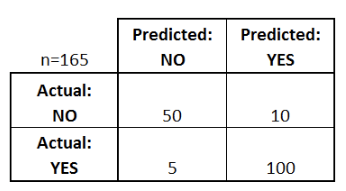


What can we learn from this matrix?

* There are two possible predicted classes: "yes" and "no". If we were predicting the presence of a disease, for example, "yes" would mean they have the disease, and "no" would mean they don't have the disease.
* The classifier made a total of 165 predictions (e.g., 165 patients were being tested for the presence of that disease).
* Out of those 165 cases, the classifier predicted "yes" 110 times, and "no" 55 times.
* In reality, 105 patients in the sample have the disease, and 60 patients do not.

Let's now define the most basic terms, which are whole numbers (not rates):

* true positives (TP): These are cases in which we predicted yes (they have the disease), and they do have the disease.
* true negatives (TN): We predicted no, and they don't have the disease.
* false positives (FP): We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")
* false negatives (FN): We predicted no, but they actually do have the disease. (Also known as a "Type II error.")

I've added these terms to the confusion matrix, and also added the row and column totals:


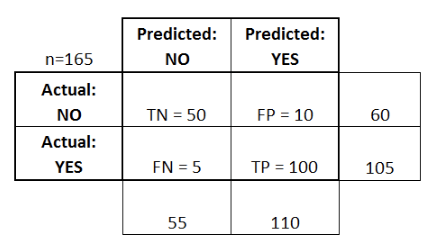
This is a list of rates that are often computed from a confusion matrix for a binary classifier:

* Accuracy: Overall, how often is the classifier correct?
  * (TP+TN)/total = (100+50)/165 = 0.91
* Misclassification Rate: Overall, how often is it wrong?
  * (FP+FN)/total = (10+5)/165 = 0.09
  * equivalent to 1 minus Accuracy
  * also known as "Error Rate"
* True Positive Rate: When it's actually yes, how often does it predict yes?
  * TP/actual yes = 100/105 = 0.95
  * also known as "Sensitivity" or "Recall"
* False Positive Rate: When it's actually no, how often does it predict yes?
  * FP/actual no = 10/60 = 0.17
  * Specificity: When it's actually no, how often does it predict no?
* TN/actual no = 50/60 = 0.83
  * equivalent to 1 minus False Positive Rate
* Precision: When it predicts yes, how often is it correct?
  * TP/predicted yes = 100/110 = 0.91
* Prevalence: How often does the yes condition actually occur in our sample?
  * actual yes/total = 105/165 = 0.64

## Example confusion matrix for the Iris Data

#See labs for this unit for more details of this

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()

X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(C=1e6, multi_class="multinomial", solver="lbfgs")
model.fit(X_train, y_train)
preds_test = model.predict(X_test)
preds_train = model.predict(X_train)
class_labels = ["setosa", "versicolour", "virginica"]

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

#See labs for this unit for more details of this
cm_train = confusion_matrix(y_train, preds_train).astype(np.float32)
cm_train /= cm_train.sum(axis=1)[:, np.newaxis]

cm_test = confusion_matrix(y_test, preds_test).astype(np.float32)
cm_test /= cm_test.sum(axis=1)[:, np.newaxis]

Visualize them

In [ ]:
plt.figure(figsize=(20, 8))

plt.subplot(121)
g = sns.heatmap(cm_train, vmin=0, vmax=1, annot=True, cmap="Reds")
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)
g.set(xticklabels=class_labels, yticklabels=class_labels)
plt.title("Train", fontsize=14)

plt.subplot(122)
g = sns.heatmap(cm_test, vmin=0, vmax=1, annot=True, cmap="Reds")
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)
g.set(xticklabels=class_labels, yticklabels=class_labels)
plt.title("Test", fontsize=14);

Looking at the confusions matrices for training, setosa perfectly separates from two other classes. In the test confusion matrix we see perfect classification (very unusual and suspect in the real world)

# Task:  20 class text classifier via Naive Bayes
Your task here is to build a gridsearch pipeline like the one presented in the previous sections; please adapt it to get your multi-class text classifier pipeline using cross fold validation on all 20 classes from the `20 newsgroups dataset`. Here are some hyperparameters to consider but don't limit yourself to these:

* number of terms
* types of ngrams
* TFIDF
* Naive Bayes classifier type and smoothing



Have fun! Please report your best score and configuration. And discuss your confusion matrix analysis for the best configuration.


##  Task: Pipeline & Grid search

This grid search will take some time (at least 20 minutes or more to run on a 4-core machine). Recall the following GridSearch will use all available cores: 

```python
GridSearchCV(pipelinee, parameters, cv=3, n_jobs=-1, verbose=1)
```

since `n_jobs` is set to `-1` 

Perform grid search where the score being used to evaluate each hyperparameter combination is `precision_macro`.

In [ ]:
%%time

from __future__ import print_function

from pprint import pprint
from time import time
import logging

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

%matplotlib inline

##############################################################################
np.random.seed(42)

# Use all categories for the analysis

categories = None

print("Loading 20 newsgroups dataset:")

data = fetch_20newsgroups(subset='train', categories=categories)

print("%d documents" % len(data.filenames))
print("%d categories" % len(data.target_names))
print()


# #############################################################################
# Define a pipeline combining  text feature extractors 
#countVectorizer and TfidfTransformer
# with SGDClassifier using log for loss and max_iter=5
#==================================================#
#               Your code starts here              #
#==================================================#
pipeline = Pipeline([
    ('vect', CountVectorizer()), 
    ('tfidf', TfidfTransformer()), 
    ('clf', MultinomialNB()),  #let's use MultinomialNB() ])
# TODO - change the following code
# pipeline =                     
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#



if __name__ == "__main__":
    # #############################################################################
    # Set up Grid search using the defined pipeline 
    # and parameters 
    # Make sure to use 3 folds for cross validation
    # use macro average precision scores scoring='precision_macro'
    # I.e., macro average: compute precision for each class and take avg
    #==================================================#
    #               Your code starts here              #
    #==================================================#
    scoring='precision_macro'
    # select handful of parameters to explore
    parameters = {'vect__ngram_range': ((1,1),(1,2)),
                  'tfidf__use_idf': (True, False),
                  'clf__alpha': (1e-7, 1e-5, 1e-3, 1), #laplace
                  }
    grid_search = GridSearchCV(pipeline, parameters, cv=3, n_jobs=-1, verbose=1, scoring=scoring)
    # TODO - change the following code
    #parameters = {'vect__ngram_range': ((1,1),(1,2)),
    #              'tfidf__use_idf': (True, False),
    #              'clf': (.....), # please explore different regularization terms,
    # grid_search = GridSearchCV(.... scoring='precision_macro')                    
    #==================================================#
    #               Your code ends here                #
    #               Please don't add code below here   #
    #==================================================#
    

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(data.data, data.target)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best parameters set found on development set:")
    print()
    print(grid_search.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = grid_search.cv_results_['mean_test_score']
    stds = grid_search.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
         #print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
         print()

    '''print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, grid_search.predict(X_test)
    print(classification_report(y_true, y_pred))
    print() 
    '''
    
    scoring='precision_macro'
     # Print best accuracy score and best parameter combination
    print("Best %s score: %0.3f" %(scoring, grid_search.best_score_))
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
    #Sort the grid search results in decreasing order of average         
    sortedGridSearchResults = sorted(zip(grid_search.cv_results_["params"], grid_search.cv_results_["mean_test_score"]), 
           key=lambda x: x[1], reverse=True)
    print(f'Top 2 GridSearch results: ({scoring}, hyperparam Combo)\n {sortedGridSearchResults[0]}\n {sortedGridSearchResults[1]}\n\n\n')
    #print(f'{grid_search.cv_results_['mean_test_score']}')
    print(f'{grid_search.cv_results_["mean_test_score"]}')
    print(f'{grid_search.cv_results_["params"]}')
    print(f'{grid_search.cv_results_}')  #show everything  
 

## Confusion matrix for train data: 

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
preds_train = grid_search.best_estimator_.predict(data.data)

cm_train = confusion_matrix(data.target, preds_train).astype(np.float32)
cm_train /= cm_train.sum(axis=1)[:, np.newaxis]

cm_train.size #20 classes by 20 classes

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(150,150))
sns.set(font_scale=3)
plt.subplot(121)
g = sns.heatmap(cm_train, fmt='.3g', vmin=0, vmax=1, annot=True, cmap="Reds", square=True, cbar_kws={'shrink':.35})
plt.xlabel("Predicted", fontsize=54)
plt.ylabel("True", fontsize=54)
g.set(xticklabels=data.target_names, yticklabels=data.target_names)
plt.xticks(rotation='vertical',fontsize=48)
plt.yticks(rotation='horizontal',fontsize=48)
plt.title("\nConfusion Matrix for 20newsgroups 'TRAIN' Data\n", fontsize=54);

## Confusion matrix for test data: 

In [ ]:
data = fetch_20newsgroups(subset='test', categories=categories)

In [ ]:
preds_train = grid_search.best_estimator_.predict(data.data)

cm_train = confusion_matrix(data.target, preds_train).astype(np.float32)
cm_train /= cm_train.sum(axis=1)[:, np.newaxis]

cm_train.size #20 classes by 20 classes

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(150,150))
sns.set(font_scale=3)
plt.subplot(121)
g = sns.heatmap(cm_train, fmt='.3g', vmin=0, vmax=1, annot=True, cmap="Reds", square=True, cbar_kws={'shrink':.35})
plt.xlabel("Predicted", fontsize=54)
plt.ylabel("True", fontsize=54)
g.set(xticklabels=data.target_names, yticklabels=data.target_names)
plt.xticks(rotation='vertical',fontsize=48)
plt.yticks(rotation='horizontal',fontsize=48)
plt.title("\nConfusion Matrix for 20newsgroups 'Test' Data\n", fontsize=54);

# OPTIONAL: Homegrown Multinomial/Bernoulli Laplace Smoothed  Naive Bayes 
## Homegrown Multinomial Laplace Smoothed  Naive Bayes 
The following is an implementation of multinomial Naive Bayes class for text classification. Complete the following code and report the accuracy for homegrown MultinomialNaiveBayes model.


In [32]:
#Adapted from  https://gist.github.com/asdfgeoff/5d63704c17052e642d3ea93351dda152
#        and based on https://geoffruddock.com/naive-bayes-from-scratch-with-numpy/

from typing import Callable, Union
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils.validation import check_X_y, check_array
from IPython.display import display

array_like = Union[list, np.ndarray]
matrix_like = Union[np.ndarray, pd.DataFrame]


def make_spam_dataset() -> (pd.DataFrame, np.ndarray, Callable):
    """ Create a small toy dataset for MultinomialNB implementation

    Returns:
        X: docXterm word count matrix
        y: indicator of whether or not message is spam
        msg_tx_func: a function to transform new test data into word count matrix
    """

    vocab = [
        'secret', 'offer', 'low', 'price', 'valued', 'customer', 'today',
        'dollar', 'million', 'sports', 'is', 'for', 'play', 'healthy', 'pizza'
    ]

    spam = [
        'million dollar offer',
        'secret offer today',
        'secret is secret'
    ]

    not_spam = [
        'low price for valued customer',
        'play secret sports today',
        'sports is healthy',
        'low price pizza'
    ]

    all_messages = spam + not_spam

    vectorizer = CountVectorizer(vocabulary=vocab)
    word_counts = vectorizer.fit_transform(all_messages).toarray()
    df = pd.DataFrame(word_counts, columns=vocab)
    is_spam = [1] * len(spam) + [0] * len(not_spam)
    msg_tx_func = lambda x: vectorizer.transform(x).toarray() #convert sparse docXterm to dense docXterm
    print("Doc by Term matrix word count")
    display(pd.DataFrame(np.c_[["Spam", "Spam", "Spam", "NotSpam", "NotSpam", "NotSpam", "NotSpam"], word_counts], columns=["CLASS"]+vocab))
    # return docXterm matrix, y class vector,  sparse docXterm to dense docXterm converter
    return df.to_numpy(), np.array(is_spam), msg_tx_func
    

class MultinomialNaiveBayes(object):
    """ DIY implementation of binary Naive Bayes classifier based on categorical data
        based on Multinomial version of P(word_i|C)

    Notes:
        - inspired by http://kenzotakahashi.github.io/naive-bayes-from-scratch-in-python.html
        - cannot fully vectorize fit method, since classes may have unequal sizes

    """

    def __init__(self, alpha=1.0):
        """ """
        self.alpha = alpha #smoothing
        self.prior = None
        self.word_counts = None
        self.word_proba = None
        self.is_fitted_ = False

    def fit(self, X: matrix_like, y: array_like):
        """ Fit training data for Naive Bayes classifier """

        # not strictly necessary, but this ensures we have clean input
        X, y = check_X_y(X, y)
        n = X.shape[0]

        X_by_class = np.array([X[y == c] for c in np.unique(y)])
        """X_by_class: [array([[0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                                [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
                                [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0],
                                [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])
                         array([[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
                                [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                                [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])] """
        print(f"X_by_class: {X_by_class}")
        self.prior = np.array([len(X_class) / n for X_class in X_by_class]) #priors

        self.smoothed_word_counts = np.array([sub_arr.sum(axis=0) for sub_arr in X_by_class]) + self.alpha
        print(f"self.word_counts:{self.word_counts}")
        self.lk_word = self.smoothed_word_counts / self.smoothed_word_counts.sum(axis=1).reshape(-1, 1)
        print(f"self.lk_word:{self.lk_word}")
        self.is_fitted_ = True
        return self

    def predict_proba(self, X: matrix_like):
        """ Predict probability of class membership """

        assert self.is_fitted_, 'Model must be fit before predicting'
        X = check_array(X)

        # loop over each observation to calculate conditional probabilities
        class_numerators = np.zeros(shape=(X.shape[0], self.prior.shape[0]))
        for i, x in enumerate(X):
            word_exists = x.astype(bool)
            lk_words_present = self.lk_word[:, word_exists] ** x[word_exists]
            lk_message = (lk_words_present).prod(axis=1)
            class_numerators[i] = lk_message * self.prior

        normalize_term = class_numerators.sum(axis=1).reshape(-1, 1)
        conditional_probas = class_numerators / normalize_term
        assert (conditional_probas.sum(axis=1) - 1 < 0.001).all(), 'Rows should sum to 1'
        return conditional_probas

    def predict(self, X: matrix_like):
        """ Predict class with highest probability """
    
        return self.predict_proba(X).argmax(axis=1)

        


def test_against_benchmark():
    """ Check that DIY model matches outputs from scikit-learn estimator """
    from sklearn.naive_bayes import MultinomialNB
    X, y, _ = make_spam_dataset()
    print(y)
    bench = MultinomialNB().fit(X, y)
    model = MultinomialNaiveBayes(alpha=1).fit(X, y) #homegrown
    
    posterior_probs = model.predict_proba(X)
    
    print("Posterior probs via the Multinomial Laplace Smoothed  Naive Bayes model")
    display(pd.DataFrame(np.c_[["Spam", "Spam", "Spam", "NotSpam", "NotSpam", "NotSpam", "NotSpam"], posterior_probs], 
                         columns=["CLASS", "Pr(NotSpam|Doc)", "Pr(SPAM|Doc)"]))

    ## Complete code to calculate the accurracy
    ##
    ##
    
    
    print(f"the accuracy of the model on the training set is {acc:.5f}")
    #breakpoint()
    #import pdb;  pdb.set_trace() 
    assert (model.prior / np.exp(bench.class_log_prior_) - 1 < 0.001).all()
    print('[✔︎] Identical prior probabilities')
    
    assert (model.lk_word / np.exp(bench.feature_log_prob_) - 1 < 0.001).all()
    print('[✔︎] Identical word likelihoods')
    
    assert (model.predict_proba(X) / bench.predict_proba(X) - 1 < 0.001).all()
    print('[✔︎] Identical predictions')


if __name__ == '__main__':
    test_against_benchmark()

Doc by Term matrix word count


CLASS secret offer low price valued customer today dollar million sports  \
0     Spam      0     1   0     0      0        0     0      1       1      0   
1     Spam      1     1   0     0      0        0     1      0       0      0   
2     Spam      2     0   0     0      0        0     0      0       0      0   
3  NotSpam      0     0   1     1      1        1     0      0       0      0   
4  NotSpam      1     0   0     0      0        0     1      0       0      1   
5  NotSpam      0     0   0     0      0        0     0      0       0      1   
6  NotSpam      0     0   1     1      0        0     0      0       0      0   

  is for play healthy pizza  
0  0   0    0       0     0  
1  0   0    0       0     0  
2  1   0    0       0     0  
3  0   1    0       0     0  
4  0   0    1       0     0  
5  1   0    0       1     0  
6  0   0    0       0     1

[1 1 1 0 0 0 0]
X_by_class: [array([[0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])
 array([[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])]
self.word_counts:None
self.lk_word:[[0.06666667 0.03333333 0.1        0.1        0.06666667 0.06666667
  0.06666667 0.03333333 0.03333333 0.1        0.06666667 0.06666667
  0.06666667 0.06666667 0.06666667]
 [0.16666667 0.125      0.04166667 0.04166667 0.04166667 0.04166667
  0.08333333 0.08333333 0.08333333 0.04166667 0.08333333 0.04166667
  0.04166667 0.04166667 0.04166667]]
Posterior probs via the Multinomial Laplace Smoothed  Naive Bayes model


CLASS      Pr(NotSpam|Doc)          Pr(SPAM|Doc)
0     Spam  0.05382674516400337    0.9461732548359966
1     Spam  0.10215482841181166    0.8978451715881883
2     Spam  0.14578587699316628    0.8542141230068336
3  NotSpam   0.9691902710270238  0.030809728972976166
4  NotSpam   0.6209824135839903    0.3790175864160097
5  NotSpam   0.8037676609105181   0.19623233908948196
6  NotSpam   0.9247441300421433   0.07525586995785671

after breakpoint
[✔︎] Identical prior probabilities
[✔︎] Identical word likelihoods
[✔︎] Identical predictions


## OPTIONAL TASK: Implement the Laplace = 1 smoothed Bernouilli Naive Bayes 
Adapt the code given in the above section to implement Laplace = 1 smoothed Bernouilli Naive Bayes. 

In [ ]:
class BernoulliNaiveBayes(object):
    """
    Complete comments and implementation of BernoulliNaiveBayes
    """
    def __init__(self, alpha=1.0):
        """ """
        self.alpha = alpha #smoothing
        self.prior = None
        self.word_counts = None
        self.word_proba = None
        self.is_fitted_ = False

    def fit(self, X: matrix_like, y: array_like):
        """ Fit training data for Naive Bayes classifier """
        #==================================================#
        #               Your code starts here              #
        
        
        
        #==================================================#
         return self

    def predict_proba(self, X: matrix_like):
        """ Predict probability of class membership """
        
        #==================================================#
        #               Your code starts here              #
        
        
        
        #==================================================#
        

         return conditional_probas

    def predict(self, X: matrix_like):
        """ Predict class with highest probability """
        return self.predict_proba(X).argmax(axis=1)

def test_against_benchmark():
    """ Check that DIY model matches outputs from scikit-learn estimator """
    from sklearn.naive_bayes import MultinomialNB
    X, y, _ = make_spam_dataset()
    print(y)
    bench = ???????().fit(X, y) #against SKLearns implementation
    model = BernoulliNaiveBayes(alpha=1).fit(X, y) #homegrown
    
    posterior_probs = model.predict_proba(X)
    
    print("Posterior probs via the Bernoilli Laplace Smoothed  Naive Bayes model")
    display(pd.DataFrame(np.c_[["Spam", "Spam", "Spam", "NotSpam", "NotSpam", "NotSpam", "NotSpam"], posterior_probs], 
                         columns=["CLASS", "Pr(NotSpam|Doc)", "Pr(SPAM|Doc)"]))

    ## Complete code to calculate the accurracy
    ##
    ##
    
    
    print(f"the accuracy of the Bernoilli NB model on the training set is {acc:.5f}")
    #breakpoint()
    #import pdb;  pdb.set_trace() 
    assert (model.prior / np.exp(bench.class_log_prior_) - 1 < 0.001).all()
    print('[✔︎] Identical prior probabilities')
    
    assert (model.lk_word / np.exp(bench.feature_log_prob_) - 1 < 0.001).all()
    print('[✔︎] Identical word likelihoods')
    
    assert (model.predict_proba(X) / bench.predict_proba(X) - 1 < 0.001).all()
    print('[✔︎] Identical predictions')


if __name__ == '__main__':
    test_against_benchmark()

## References
This notebook is an adaption  on the following:

* https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1
*  Maximum Likelihood Estimation (MLE), [Richard W. Evans](https://sites.google.com/site/rickecon/) and [GitHub Repo] (https://github.com/rickecon/Notebooks/tree/master/MLE).


# [OPTIONAL] Homegrown Gaussian Niave Bayes with smoothing for 8x8  MNIST digit classification



## Digits dataset

TThe MNIST dataset is a set of handwritten digits, and our job is to build a computer program that takes as input an image of a digit, and outputs what digit it is.  The digits dataset consists of 8x8
pixel images of digits. 

* The `images` attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. 
* The `target` attribute of the dataset stores the digit each image represents and this is included in the title of the 4 plots below.

Note: if we were working from image files (e.g., 'png' files), we would load them using :func:`matplotlib.pyplot.imread`.



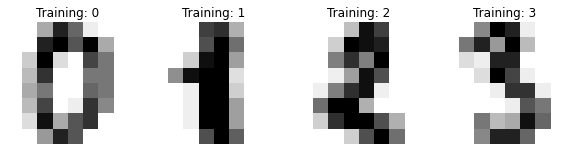

In [98]:
import matplotlib.pyplot as plt
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

### Data prep and splitting

To apply a classifier on this data, we need to flatten the images, turning
each 2-D array of grayscale values from shape ``(8, 8)`` into shape
``(64,)``. Subsequently, the entire dataset will be of shape
``(n_samples, n_features)``, where ``n_samples`` is the number of images and
``n_features`` is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a support
vector classifier on the train samples. The fitted classifier can
subsequently be used to predict the value of the digit for the samples
in the test subset.



In [102]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 50% train and 50% test subsets
#
# TODO normalize the pixel gray level intensity values
# data /= 255
X_train, X_test, Y_train, Y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)



## Homegrown Gaussian Niave Bayes with smoothing for MNIST digit classification

Training time: 0:00:00.000639
Train accuracy:0.927
Time to compute train accuracy: 0:00:00.006427 Train size: 898
Test accuracy:0.851
Time to compute test accuracy: 0:00:00.005514 Test size: 899





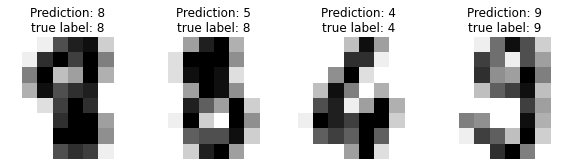

In [327]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input
import numpy as np
import pandas as pd
from datetime import datetime
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets, svm, metrics
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# Import datasets, classifiers and performance metrics
digits = datasets.load_digits()

# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 50% train and 50% test subsets
#
X_train, X_test, Y_train, Y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

class GaussianNaiveBayes(object):
    """ 
    Gaussian Naive Bayes with smoothing 
    Naive Bayes are a group of supervised machine learning classification 
    algorithms based on the Bayes theorem. It is a simple classification technique, that scales
    linearly functionality with the data.
    
    Gaussian Naive Bayes is a variant of Naive Bayes that follows Gaussian normal distribution 
    and supports continuous data. Gaussian Naive Bayes assumes independence of the features, 
    which means the covariance matrices are diagonal matrices.
    """
    def fit(self, X, Y, smoothing=1e-2):
        self.gaussians = dict()
        self.priors = dict()
        labels = set(Y)
        for c in labels:
            current_x = X[Y == c]
            self.gaussians[c] = {
                'mean': current_x.mean(axis=0),
                'var': current_x.var(axis=0) + smoothing,
            }
            self.priors[c] = float(len(Y[Y == c])) / len(Y)

    def score(self, X, Y):
        """ Compute the accuracy of the model"""
        P = self.predict(X)
        return np.mean(P == Y)

    def predict(self, X):
        N, D = X.shape
        K = len(self.gaussians)
        P = np.zeros((N, K))
        # iteritems() is a dictionary method, which returns a lazily constructed
        # sequence of all (key, value) pairs in the dictionary.
        for c, g in iteritems(self.gaussians): 
            mean, var = g['mean'], g['var'] #note covariance matrices are diagonal matrices
            P[:,c] = mvn.logpdf(X, mean=mean, cov=var) + np.log(self.priors[c]) #P(y_i=class|X_i)
        # display(pd.DataFrame(P, columns=self.gaussians.keys()).head()) # posterior probs P(y=class|image) 
        return np.argmax(P, axis=1) #return a column of class predictions; one for each example row


if __name__ == '__main__':
    # Learn the Gaussian Naive Bayes digits classifier on the train subset
    clf = GaussianNaiveBayes()
    t0 = datetime.now()
    clf.fit(X_train, Y_train)
    print("Training time:", (datetime.now() - t0))

    t0 = datetime.now()
    print(f"Train accuracy:{clf.score(X_train, Y_train):.3f}", )
    print("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(Y_train))

    t0 = datetime.now()
    print(f"Test accuracy:{clf.score(X_test, Y_test):.3f}")
    print("Time to compute test accuracy:", (datetime.now() - t0), "Test size:", len(Y_test))
    
    # Predict the value of the digit on the test subset
    predicted = clf.predict(X_test)
    print("\n\n")
    #Visualize predictions
    _, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
    for ax, image, prediction, true_label in zip(axes, X_test, predicted, Y_test):
        ax.set_axis_off()
        image = image.reshape(8, 8)
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
        ax.set_title(f"Prediction: {prediction}\ntrue label: {true_label}")

### Use SKLearn's implementation of GaussianNB with different variance smoothings!!

Use SKLearn's implementation of GaussianNB with different variance smoothings!!

Here are other Naive Bayes models
* GaussianNB :  Naive Bayes classifier for continuous input variables
* BernoulliNB : Naive Bayes classifier for multivariate Bernoulli models.
* CategoricalNB : Naive Bayes classifier for categorical features.
ComplementNB : Complement Naive Bayes classifier.
* MultinomialNB : Naive Bayes classifier for multinomial models.


Train accuracy var_smoothing=0.01:0.943
Test accuracy  var_smoothing=0.01: 0.885



Train accuracy var_smoothing=1e-09:0.859
Test accuracy  var_smoothing=1e-09: 0.808





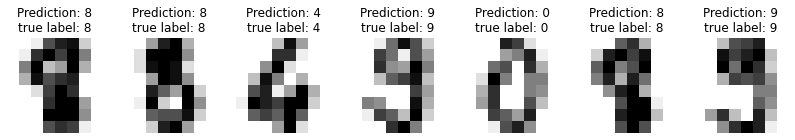

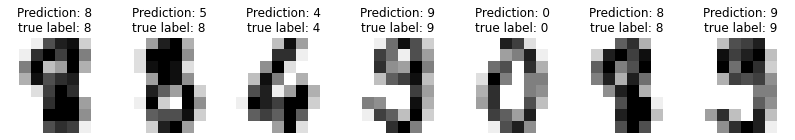

In [351]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input
import numpy as np
import pandas as pd
from datetime import datetime
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets, svm, metrics
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.naive_bayes import GaussianNB


# Import datasets, classifiers and performance metrics
digits = datasets.load_digits()

# flatten the images
# digits.target and digits.images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 50% train and 50% test subsets
#
# TODO normalize the pixel gray level intensity values
#data /=255 
X_train, X_test, Y_train, Y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)
# Learn the Gaussian  digits classifier on the MNIST
var_smoothings = [1e-2, 1e-9]
for var_smoothing in var_smoothings:
    model_sk_gaussian = GaussianNB(var_smoothing=var_smoothing)
    model_sk_gaussian.fit(X_train, Y_train)
    print(f"Train accuracy var_smoothing={var_smoothing}:{model_sk_gaussian.score(X_train, Y_train):.3f}", )
    print(f"Test accuracy  var_smoothing={var_smoothing}: {model_sk_gaussian.score(X_test, Y_test):.3f}")

    # Predict the value of the digit on the test subset
    predicted = model_sk_gaussian.predict(X_test)
    print("\n\n")
    #Visualize predictions
    _, axes = plt.subplots(nrows=1, ncols=7, figsize=(14, 3))
    for ax, image, prediction, true_label in zip(axes, X_test, predicted, Y_test):
        ax.set_axis_off()
        image = image.reshape(8, 8)
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
        ax.set_title(f"Prediction: {prediction}\ntrue label: {true_label}")

Above we visualize the first 4 test samples and show their predicted
digit value versus their true valuse in the title.



### Normalize the input features

Rescaling, or min-max normalization, is a simple method for bringing your data into a  range $[0, 1]. This can be accomplished by simply dividing each pixel by 255, the max grayscale intensity level.

Training time: 0:00:00.000666
Train accuracy:0.891
Time to compute train accuracy: 0:00:00.006570 Train size: 898
Test accuracy:0.826
Time to compute test accuracy: 0:00:00.006478 Test size: 899





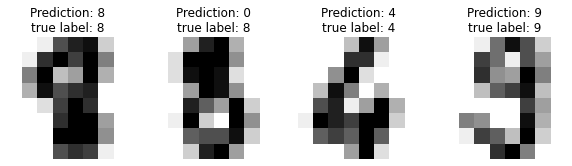

In [326]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input
import numpy as np
import pandas as pd
from datetime import datetime
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets, svm, metrics
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# Import datasets, classifiers and performance metrics
digits = datasets.load_digits()

# flatten the images
# digits.target and digits.images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 50% train and 50% test subsets
#
# TODO normalize the pixel gray level intensity values

data /= 255.0 #normalize the pixel features
X_train, X_test, Y_train, Y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)


class GaussianNaiveBayes(object):
    """ 
    Gaussian Naive Bayes with smoothing 
    Naive Bayes are a group of supervised machine learning classification 
    algorithms based on the Bayes theorem. It is a simple classification technique, that scales
    linearly functionality with the data.
    
    Gaussian Naive Bayes is a variant of Naive Bayes that follows Gaussian normal distribution 
    and supports continuous data. Gaussian Naive Bayes assumes independence of the features, 
    which means the covariance matrices are diagonal matrices.
    """
    def fit(self, X, Y, smoothing=1e-2):
        self.gaussians = dict()
        self.priors = dict()
        labels = set(Y)
        for c in labels:
            current_x = X[Y == c]
            self.gaussians[c] = {
                'mean': current_x.mean(axis=0),
                'var': current_x.var(axis=0) + smoothing,
            }
            self.priors[c] = float(len(Y[Y == c])) / len(Y)

    def score(self, X, Y):
        """ Compute the accuracy of the model"""
        P = self.predict(X)
        return np.mean(P == Y)

    def predict(self, X):
        N, D = X.shape
        K = len(self.gaussians)
        P = np.zeros((N, K))
        # iteritems() is a dictionary method, which returns a lazily constructed
        # sequence of all (key, value) pairs in the dictionary.
        for c, g in iteritems(self.gaussians): 
            mean, var = g['mean'], g['var'] #note covariance matrices are diagonal matrices
            P[:,c] = mvn.logpdf(X, mean=mean, cov=var) + np.log(self.priors[c]) #P(y_i=class|X_i)
        # display(pd.DataFrame(P, columns=self.gaussians.keys()).head()) # posterior probs P(y=class|image) 
        return np.argmax(P, axis=1) #return a column of class predictions; one for each example row


if __name__ == '__main__':
    # Learn the Gaussian Naive Bayes digits classifier on the train subset
    clf_norm = GaussianNaiveBayes()
    t0 = datetime.now()
    clf_norm.fit(X_train, Y_train)
    print("Training time:", (datetime.now() - t0))

    t0 = datetime.now()
    print(f"Train accuracy:{clf_norm.score(X_train, Y_train):.3f}", )
    print("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(Y_train))

    t0 = datetime.now()
    print(f"Test accuracy:{clf_norm.score(X_test, Y_test):.3f}")
    print("Time to compute test accuracy:", (datetime.now() - t0), "Test size:", len(Y_test))
    
    # Predict the value of the digit on the test subset
    predicted = clf_norm.predict(X_test)
    print("\n\n")
    #Visualize predictions
    _, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
    for ax, image, prediction, true_label in zip(axes, X_test, predicted, Y_test):
        ax.set_axis_off()
        image = image.reshape(8, 8)
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
        ax.set_title(f"Prediction: {prediction}\ntrue label: {true_label}")

### Binarize the pixel intensity variables and learn a Bernoulli model

* Hint: use np.where(data == 0, .....)


Train accuracy:0.855
Test accuracy:0.826





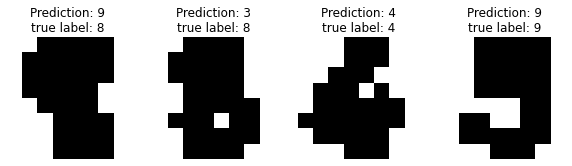

In [339]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input
import numpy as np
import pandas as pd
from datetime import datetime
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets, svm, metrics
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.naive_bayes import BernoulliNB


# Import datasets, classifiers and performance metrics
digits = datasets.load_digits()

# flatten the images
# digits.target and digits.images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 50% train and 50% test subsets
#
# TODO normalize the pixel gray level intensity values

data = np.where(data == 0, 0, 1)
X_train, X_test, Y_train, Y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)
# Learn the Gaussian BernoulliNB digits classifier on the MNIST

model_bernoulli = BernoulliNB()
model_bernoulli.fit(X_train, Y_train)
print(f"Train accuracy:{model_bernoulli.score(X_train, Y_train):.3f}", )
print(f"Test accuracy: {model_bernoulli.score(X_test, Y_test):.3f}")

# Predict the value of the digit on the test subset
predicted = model_bernoulli.predict(X_test)
print("\n\n")
#Visualize predictions
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction, true_label in zip(axes, X_test, predicted, Y_test):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}\ntrue label: {true_label}")

## Examine the GNB classification performance via confusion matrix

SKLearn provides the `~sklearn.metrics.classification_report` function to build  a text report showing
the main classification metrics.



In [112]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(Y_test, predicted)}\n"
)

Classification report for classifier <__main__.GaussianNaiveBayes object at 0xffff55db4730>:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        88
           1       0.89      0.69      0.78        91
           2       0.81      0.95      0.88        86
           3       0.91      0.82      0.87        91
           4       0.96      0.82      0.88        92
           5       0.77      0.86      0.81        91
           6       0.98      0.97      0.97        91
           7       0.79      0.87      0.82        89
           8       0.76      0.72      0.74        88
           9       0.72      0.86      0.78        92

    accuracy                           0.85       899
   macro avg       0.86      0.85      0.85       899
weighted avg       0.86      0.85      0.85       899




We can also plot a `confusion matrix <confusion_matrix>` of the
true digit values and the predicted digit values.



Confusion matrix:
[[85  0  0  0  1  1  0  0  0  1]
 [ 0 63  4  0  1  0  0  0 11 12]
 [ 0  3 82  0  0  0  0  0  0  1]
 [ 0  0  4 75  0  2  0  2  5  3]
 [ 0  0  0  0 75  0  0 14  1  2]
 [ 0  1  0  3  0 78  1  0  1  7]
 [ 0  1  1  0  0  0 88  0  0  1]
 [ 0  0  2  0  1  8  0 77  1  0]
 [ 0  2  8  0  0  9  0  2 63  4]
 [ 0  1  0  4  0  3  1  3  1 79]]


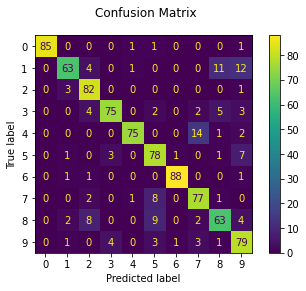

In [113]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

## Visualize GNB model Pr(pixel|class)

In [158]:
clf.gaussians[0]['mean'].reshape(8, 8)

array([[ 0.        ,  0.        ,  3.75555556, 13.01111111, 11.62222222,
         3.33333333,  0.04444444,  0.        ],
       [ 0.        ,  0.76666667, 12.62222222, 14.01111111, 12.5       ,
        11.74444444,  1.38888889,  0.        ],
       [ 0.        ,  3.7       , 14.81111111,  5.55555556,  2.85555556,
        12.31111111,  4.15555556,  0.        ],
       [ 0.        ,  5.28888889, 13.27777778,  1.7       ,  0.23333333,
         9.8       ,  6.45555556,  0.        ],
       [ 0.        ,  5.8       , 12.01111111,  0.8       ,  0.04444444,
         9.65555556,  6.86666667,  0.        ],
       [ 0.        ,  3.43333333, 13.58888889,  2.14444444,  1.44444444,
        11.97777778,  5.44444444,  0.        ],
       [ 0.        ,  0.78888889, 13.16666667, 10.52222222, 10.86666667,
        13.72222222,  2.17777778,  0.        ],
       [ 0.        ,  0.        ,  4.04444444, 13.37777778, 13.52222222,
         4.95555556,  0.16666667,  0.        ]])

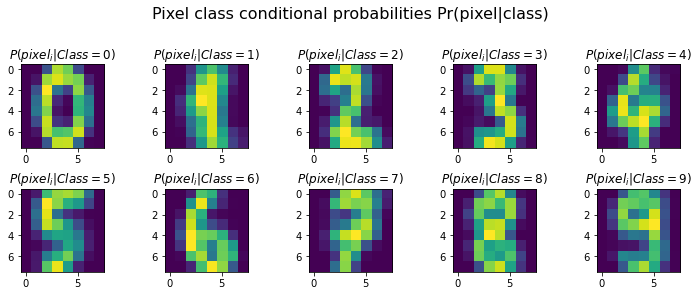

In [171]:
# plot the mean of each class
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4), constrained_layout=True)
fig.suptitle('Pixel class conditional probabilities Pr(pixel|class)\n', fontsize=16)

axes = axes.reshape(-1)
for ax, class_i in  zip(axes, clf.gaussians):
    #import pdb; pdb.set_trace()
    #print(clf.gaussians[class_i]['mean'].reshape(8, 8))
    ax.imshow(clf.gaussians[class_i]['mean'].reshape(8, 8))
    ax.set_title(f"$P (pixel_i|Class={class_i})$")
